In [1]:
import os
import matplotlib.pyplot as plt
from funman_demo.parameter_space_plotter import ParameterSpacePlotter
from funman.server.query import FunmanResults
import pandas as pd
import json
from matplotlib.collections import PolyCollection
import numpy as np

RESULTS_DIR = os.path.join(
    os.path.dirname(os.path.abspath("")), "scratch/out/hackathon"
)

out_dir = os.path.join(os.path.dirname(os.path.abspath("")), "out")

if not os.path.exists(out_dir):
    os.mkdir(out_dir)

def get_job_results(job):
    try:
        results_file = os.path.join(RESULTS_DIR, f"{job}.json")
        results: FunmanResults = FunmanResults.parse_file(results_file)
        return results
    except:
        with open(results_file, "r") as f:
            s = f.read()
            j = json.loads(json.loads(s))
            results: FunmanResults= FunmanResults.parse_obj(j)
            return results

def plot(job_num=9, parameters=["t_0", "num_steps"]):
    job=jobs[job_num]
    results = get_job_results(job)
    ParameterSpacePlotter(
        results.parameter_space, plot_points=True, parameters=parameters
    ).plot(show=False)
    plt.savefig(f"{out_dir}/{results.id}.png")
    plt.show()
    plt.close()

jobs = [
   "863e1aa6-ac9b-4697-b8f9-833fef1e4f31", # parameter synthesis - plot true/false boxes (2 steps)
   "241310f7-940a-4850-9ed6-16f4e448132b", # parameter synthesis - plot true/false boxes (5 steps)
   "4b70df7e-cb11-4215-9b22-94edb045a3fd", # eval from Dan
#    "07fbb930-454c-45fe-9bae-a3cc94b39bf1", # 0 1.1.b, t_0 = 0, step_size = 4, num_steps = 100
#    "440eb793-c1f2-4625-a86a-0c4924c37e37", # 1 1.1.b, t_0 = 0, step_size = 3, num_steps = 100
#    "9e225362-e7c7-4aae-9f71-0624a9f7d727", # 2 1.1.b, t_0 = 0, step_size = 2, num_steps = 200
#    "af4c04a5-5843-4eb7-9b44-ec43459ec289", # 3 1.1.b, t_0 = 50, step_size = 4, num_steps = 100
#    "f31b6ba1-3baf-4100-bf09-80f578d56ad7", # 4 1.1.b, t_0 = 50, step_size = 3, num_steps = 100
#    "b5889ec1-ed06-4082-8a6a-400a66a53ef5", # 5 1.1.b, t_0 = 50, step_size = 1, num_steps = 300
#    "4a1fb718-5d8c-44e4-962d-f162895f260d", # 6 1.1.b, t_0 = 100, step_size = 4, num_steps = 100
#    "98a25914-e955-4693-b41e-f335d789f2c4", # 7 1.1.b, t_0 = 100, step_size = 1, num_steps = 400
#    "98a25914-e955-4693-b41e-f335d789f2c4", # 8 1.1.b, t_0 = 100, step_size = 1, num_steps = 400
#    "b57e7127-470a-4ffa-9b1d-5f1d658a22a0", # 9 ps all 
#    "0c201c6a-52fd-473e-829f-59a7c430431d", # 10 1.1.b, t_0 - 50, step_size = 1, num_steps = 400
#    "5ac1a088-d088-49f3-a46e-8a6d3d31dfbf", # 11 1.1.b, t_0 = 0, step_size = 1, num_steps = 400
#    "a0e4c698-fd47-4c31-89b6-6e17b48e1ebe", # 12 ps 10 step with point models
#    "7e2e8a7c-cb1e-4fbb-907f-a55aa6f25408", # 13 Eval S1 200 steps
#    "758fe313-3917-41ea-bc9d-683a41830216", # 14 Eval S1.1.ii.1 200 steps
#    "6265ab04-cd14-4c97-ac4a-c532a8348588", # 15 Eval s1.1.ii.1 100 steps 
#    "33cb375b-92d4-414f-8c54-2054d6d7de73", # 16 Eval s1.1.ii.2 100 steps, t_0 = 89 (default)
#    "3c08bd70-6c74-425b-bfc5-a98778bc0660", #"57f99e9d-f63b-4e58-96b9-7999e34e7f80", # 17 Eval s1.1.ii.2 200 steps, t_0 = 100
#    "4d03f120-44c0-4de7-be10-1099c3e5f3a0", # 18 Eval s1.1.ii.2 200 steps, t_0 = 0
#    "c51df8dd-7cd7-492f-bb26-7435ff6adff1", # 19 Eval s1.1.ii.2 200 steps, ps t_0 in [0, 100]
#    "727d1c44-9c0c-4a89-a059-6cb53f4fa7fd", # 20 S1.1.ii.1 100 steps (advance state)
#    "e9499da0-ef8c-4d58-9386-95a15aad918a", # 21 S1.2 50 steps, consistency
#    "f339aafc-749a-417c-afd6-fad1429e43ed", # 22 S1.2 200 steps, consistency
#    "81bb3877-35a0-4dc5-8bd9-93e6d4d31c07", # 23 S1.2 150 steps, consistency
        ]

def plot_trajectories(job_num=-1, variables=["I"], num=200):
    job=jobs[job_num]
    results = get_job_results(job)
    results.plot_trajectories(["I"], num=num)

def plot_point(job_num=-1, points_to_plot=list(range(1)), max_vars=["I"], plot_variables=["I"]):
    job=jobs[job_num]
    results = get_job_results(job)
    if points_to_plot=="*":
        points = results.parameter_space.true_points
    else:
        points = [p for i, p in enumerate(results.parameter_space.true_points) if i in points_to_plot]

    df = results.dataframe(points)
    max_var_vals = { var: {"max_percent":  df[var].max(), "max_day": df[var].idxmax()} for var in max_vars}
    print(max_var_vals)
    # df.to_csv(f"job_{job_num}.csv")
    # title=f"t_0 = {point.values['t_0']} ({point.values['num_steps']}x{point.values['step_size']})"
    title=""
    results.plot(points, variables=plot_variables, log_y=False, max_time=400, title=title, alpha=0.5, ms=0.1)
    return df

# %load_ext autoreload
# %autoreload 2
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
## Temporarily pasting this in for 3d example formation - "863e1aa6-ac9b-4697-b8f9-833fef1e4f31" true boxes

true_boxes =  [{"type": "box", "label": "true", "bounds": {"ai": {"lb": 0.4, "ub": 0.6000000000000001}, "beta": {"lb": 0.045000000000000005, "ub": 0.05}, "beta_scale": {"lb": 0.0, "ub": 1.1}, "beta_v1": {"lb": 0.009000000000000001, "ub": 0.01}, "beta_v2": {"lb": 0.002, "ub": 0.003}, "ai_R": {"lb": 0.8400000000000001, "ub": 0.8600000000000001}, "beta_R": {"lb": 0.002, "ub": 0.003}, "ai_beta_ratio": {"lb": 2.0, "ub": 4.0}, "gamma": {"lb": 0.035, "ub": 0.036000000000000004}, "mu": {"lb": 1e-05, "ub": 3e-05}, "mu_I": {"lb": 0.0, "ub": 0.1}, "mu_IV": {"lb": 0.0, "ub": 0.1}, "nu_v1": {"lb": 0.0, "ub": 0.1}, "nu_v2": {"lb": 0.0006000000000000001, "ub": 0.0007000000000000001}, "nu_R": {"lb": 0.0001, "ub": 0.001}, "num_steps": {"lb": 1.0, "ub": 1.0}, "step_size": {"lb": 1.0, "ub": 1.0}}}, 
               {"type": "box", "label": "true", "bounds": {"ai": {"lb": 0.4, "ub": 0.6000000000000001}, "beta": {"lb": 0.045000000000000005, "ub": 0.05}, "beta_scale": {"lb": 0.0, "ub": 1.1}, "beta_v1": {"lb": 0.009000000000000001, "ub": 0.01}, "beta_v2": {"lb": 0.002, "ub": 0.003}, "ai_R": {"lb": 0.8400000000000001, "ub": 0.8600000000000001}, "beta_R": {"lb": 0.002, "ub": 0.003}, "ai_beta_ratio": {"lb": 2.0, "ub": 4.0}, "gamma": {"lb": 0.035, "ub": 0.036000000000000004}, "mu": {"lb": 1e-05, "ub": 3e-05}, "mu_I": {"lb": 0.0, "ub": 0.1}, "mu_IV": {"lb": 0.0, "ub": 0.1}, "nu_v1": {"lb": 0.0, "ub": 0.1}, "nu_v2": {"lb": 0.0006000000000000001, "ub": 0.0007000000000000001}, "nu_R": {"lb": 0.0001, "ub": 0.001}, "num_steps": {"lb": 2.0, "ub": 2.0}, "step_size": {"lb": 1.0, "ub": 1.0}}}]

In [3]:
### eval example
true_boxes =  [{"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4, "ub": 0.8}, "eps_m": {"lb": 0.4, "ub": 0.8}, "num_steps": {"lb": 0.0, "ub": 0.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4, "ub": 0.8}, "eps_m": {"lb": 0.4, "ub": 0.8}, "num_steps": {"lb": 1.0, "ub": 1.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4, "ub": 0.8}, "eps_m": {"lb": 0.4, "ub": 0.8}, "num_steps": {"lb": 2.0, "ub": 2.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4, "ub": 0.8}, "eps_m": {"lb": 0.4, "ub": 0.8}, "num_steps": {"lb": 3.0, "ub": 3.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4, "ub": 0.8}, "eps_m": {"lb": 0.4, "ub": 0.8}, "num_steps": {"lb": 4.0, "ub": 4.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4, "ub": 0.8}, "eps_m": {"lb": 0.4, "ub": 0.8}, "num_steps": {"lb": 5.0, "ub": 5.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4, "ub": 0.8}, "eps_m": {"lb": 0.4, "ub": 0.8}, "num_steps": {"lb": 6.0, "ub": 6.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4, "ub": 0.8}, "eps_m": {"lb": 0.4, "ub": 0.8}, "num_steps": {"lb": 7.0, "ub": 7.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4, "ub": 0.8}, "eps_m": {"lb": 0.4, "ub": 0.8}, "num_steps": {"lb": 8.0, "ub": 8.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4, "ub": 0.8}, "eps_m": {"lb": 0.4, "ub": 0.8}, "num_steps": {"lb": 9.0, "ub": 9.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4, "ub": 0.8}, "eps_m": {"lb": 0.4, "ub": 0.8}, "num_steps": {"lb": 10.0, "ub": 10.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4, "ub": 0.8}, "eps_m": {"lb": 0.4, "ub": 0.8}, "num_steps": {"lb": 11.0, "ub": 11.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4, "ub": 0.8}, "eps_m": {"lb": 0.4, "ub": 0.8}, "num_steps": {"lb": 12.0, "ub": 12.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4, "ub": 0.8}, "eps_m": {"lb": 0.4, "ub": 0.8}, "num_steps": {"lb": 13.0, "ub": 13.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4, "ub": 0.8}, "eps_m": {"lb": 0.4, "ub": 0.8}, "num_steps": {"lb": 14.0, "ub": 14.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4, "ub": 0.8}, "eps_m": {"lb": 0.4, "ub": 0.8}, "num_steps": {"lb": 15.0, "ub": 15.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4, "ub": 0.8}, "eps_m": {"lb": 0.4, "ub": 0.8}, "num_steps": {"lb": 16.0, "ub": 16.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5931413046607245, "ub": 0.8}, "eps_m": {"lb": 0.4, "ub": 0.8}, "num_steps": {"lb": 17.0, "ub": 17.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5931413046607245, "ub": 0.8}, "eps_m": {"lb": 0.4, "ub": 0.8}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.49166476401241277, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.4, "ub": 0.8}, "num_steps": {"lb": 17.0, "ub": 17.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.4799011285712184, "ub": 0.8}, "num_steps": {"lb": 17.0, "ub": 17.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.8}, "eps_m": {"lb": 0.4, "ub": 0.8}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.49166476401241277, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.4833972691044658, "ub": 0.8}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.44604325061851413, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.4, "ub": 0.4799011285712184}, "num_steps": {"lb": 17.0, "ub": 17.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5931413046607245, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.48332232559835386, "ub": 0.8}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.8}, "eps_m": {"lb": 0.4811244631306043, "ub": 0.8}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5738731874569629, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.4, "ub": 0.4833972691044658}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.6005841920626018, "ub": 0.8}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.425490034571974, "ub": 0.44604325061851413}, "eps_m": {"lb": 0.4162925660877047, "ub": 0.4799011285712184}, "num_steps": {"lb": 17.0, "ub": 17.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5931413046607245, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.5475952852121512, "ub": 0.8}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6565403438857078, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.4168429317887298, "ub": 0.48332232559835386}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.49166476401241277, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.599372179383002, "ub": 0.8}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5478432591147915, "ub": 0.5738731874569629}, "eps_m": {"lb": 0.41768380807714, "ub": 0.4833972691044658}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4202656797703693, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.55195016341149, "ub": 0.6005841920626018}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4456445993033328, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.5251033893926876, "ub": 0.55195016341149}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.8}, "eps_m": {"lb": 0.5474397900242399, "ub": 0.8}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6565403438857078, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.48332232559835386, "ub": 0.5475952852121512}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6835622702500173, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.4, "ub": 0.4168429317887298}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5113989561119862, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.5523064215392186, "ub": 0.599372179383002}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5742192995540911, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.4833972691044658, "ub": 0.5523064215392186}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5227657780182593, "ub": 0.5478432591147915}, "eps_m": {"lb": 0.43722264773243646, "ub": 0.4833972691044658}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.43032091807227535, "ub": 0.44604325061851413}, "eps_m": {"lb": 0.40551313111965914, "ub": 0.4162925660877047}, "num_steps": {"lb": 17.0, "ub": 17.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4116052905174792, "ub": 0.425490034571974}, "eps_m": {"lb": 0.4340922039528067, "ub": 0.4799011285712184}, "num_steps": {"lb": 17.0, "ub": 17.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.8}, "eps_m": {"lb": 0.5474397900242399, "ub": 0.8}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7493972779738108, "ub": 0.8}, "eps_m": {"lb": 0.4811244631306043, "ub": 0.5474397900242399}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7816001105925017, "ub": 0.8}, "eps_m": {"lb": 0.415671440558357, "ub": 0.4811244631306043}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.758780625016346, "ub": 0.7816001105925017}, "eps_m": {"lb": 0.41624972421181905, "ub": 0.4811244631306043}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5931413046607245, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.5958023552169666, "ub": 0.8}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6282396888965445, "ub": 0.6565403438857078}, "eps_m": {"lb": 0.4372502727672093, "ub": 0.48332232559835386}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.49166476401241277, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.6394745359238281, "ub": 0.8}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.49166476401241277, "ub": 0.5113989561119862}, "eps_m": {"lb": 0.5616648943608984, "ub": 0.599372179383002}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5371126695346202, "ub": 0.5478432591147915}, "eps_m": {"lb": 0.42504050220081524, "ub": 0.43722264773243646}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4507465909187721, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.6388002201137457, "ub": 0.8}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.410357478128916, "ub": 0.4202656797703693}, "eps_m": {"lb": 0.5631005026442597, "ub": 0.6005841920626018}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.43635864641057054, "ub": 0.4456445993033328}, "eps_m": {"lb": 0.5251033893926876, "ub": 0.55195016341149}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.44773939650236216, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.5123495407398122, "ub": 0.5251033893926876}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4776102280814569, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.4799011285712184, "ub": 0.5123495407398122}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.43569030252399343, "ub": 0.44604325061851413}, "eps_m": {"lb": 0.4, "ub": 0.40551313111965914}, "num_steps": {"lb": 17.0, "ub": 17.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4, "ub": 0.4116052905174792}, "eps_m": {"lb": 0.4428573449995567, "ub": 0.4799011285712184}, "num_steps": {"lb": 17.0, "ub": 17.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.7493972779738108}, "eps_m": {"lb": 0.4942991934755532, "ub": 0.5474397900242399}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7907027031294351, "ub": 0.8}, "eps_m": {"lb": 0.4, "ub": 0.415671440558357}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7359611394401904, "ub": 0.758780625016346}, "eps_m": {"lb": 0.43410124121813287, "ub": 0.4811244631306043}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6545666316978478, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.5475952852121512, "ub": 0.5958023552169666}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6448822069631897, "ub": 0.6565403438857078}, "eps_m": {"lb": 0.4255236925903546, "ub": 0.4372502727672093}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5427850456280485, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.599372179383002, "ub": 0.6394745359238281}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4962006744884636, "ub": 0.5113989561119862}, "eps_m": {"lb": 0.5523064215392186, "ub": 0.5616648943608984}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5598274410613545, "ub": 0.5742192995540911}, "eps_m": {"lb": 0.49809707140295345, "ub": 0.5523064215392186}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5585928653194597, "ub": 0.5738731874569629}, "eps_m": {"lb": 0.40893284510929384, "ub": 0.41768380807714}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5114319290855314, "ub": 0.5227657780182593}, "eps_m": {"lb": 0.45055161676491073, "ub": 0.4833972691044658}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.470410214590668, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.6005841920626018, "ub": 0.6388002201137457}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4, "ub": 0.410357478128916}, "eps_m": {"lb": 0.5719009365847704, "ub": 0.6005841920626018}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4, "ub": 0.4116052905174792}, "eps_m": {"lb": 0.4364392929634132, "ub": 0.4428573449995567}, "num_steps": {"lb": 17.0, "ub": 17.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4103885273637027, "ub": 0.425490034571974}, "eps_m": {"lb": 0.42704469266240386, "ub": 0.4340922039528067}, "num_steps": {"lb": 17.0, "ub": 17.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.41335551723689146, "ub": 0.425490034571974}, "eps_m": {"lb": 0.4211363920302217, "ub": 0.42704469266240386}, "num_steps": {"lb": 17.0, "ub": 17.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.8}, "eps_m": {"lb": 0.600013687755748, "ub": 0.8}, "num_steps": {"lb": 23.0, "ub": 23.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7299174560851927, "ub": 0.7493972779738108}, "eps_m": {"lb": 0.4811244631306043, "ub": 0.4942991934755532}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7865229352176446, "ub": 0.7907027031294351}, "eps_m": {"lb": 0.4, "ub": 0.415671440558357}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7482417132784467, "ub": 0.758780625016346}, "eps_m": {"lb": 0.42292599074529824, "ub": 0.43410124121813287}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.7359611394401904}, "eps_m": {"lb": 0.4446620533064218, "ub": 0.4811244631306043}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6565403438857078, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.5958023552169666, "ub": 0.8}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6416948027929814, "ub": 0.6565403438857078}, "eps_m": {"lb": 0.49755586492850945, "ub": 0.5475952852121512}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.679166520222215, "ub": 0.6835622702500173}, "eps_m": {"lb": 0.40393869225263135, "ub": 0.4168429317887298}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6125721444813981, "ub": 0.6282396888965445}, "eps_m": {"lb": 0.45027778438891, "ub": 0.48332232559835386}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5478432591147915, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.6394745359238281, "ub": 0.8}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.578193309718814, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.5523064215392186, "ub": 0.599372179383002}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5478432591147915, "ub": 0.5598274410613545}, "eps_m": {"lb": 0.5083981188580272, "ub": 0.5523064215392186}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5358434418535558, "ub": 0.5478432591147915}, "eps_m": {"lb": 0.5168634943691491, "ub": 0.5523064215392186}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5628593794400119, "ub": 0.5738731874569629}, "eps_m": {"lb": 0.40369410797481753, "ub": 0.40893284510929384}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5114319290855314, "ub": 0.5227657780182593}, "eps_m": {"lb": 0.44490994798758826, "ub": 0.45055161676491073}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5035972870607992, "ub": 0.5114319290855314}, "eps_m": {"lb": 0.4519147092826498, "ub": 0.4833972691044658}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.46085182484026493, "ub": 0.470410214590668}, "eps_m": {"lb": 0.6005841920626018, "ub": 0.6388002201137457}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4, "ub": 0.4507465909187721}, "eps_m": {"lb": 0.6999069797569486, "ub": 0.8}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4262903419014105, "ub": 0.4507465909187721}, "eps_m": {"lb": 0.643869804200748, "ub": 0.6755500939434331}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4099745621441693, "ub": 0.4202656797703693}, "eps_m": {"lb": 0.5557519271465282, "ub": 0.5631005026442597}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.43098742888118624, "ub": 0.43635864641057054}, "eps_m": {"lb": 0.5314537325071153, "ub": 0.55195016341149}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4706899716708203, "ub": 0.4776102280814569}, "eps_m": {"lb": 0.4869890855946928, "ub": 0.5123495407398122}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.48001530391845526, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.47458896183777166, "ub": 0.4799011285712184}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7774114845416872, "ub": 0.8}, "eps_m": {"lb": 0.49406594122620295, "ub": 0.5474397900242399}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7816001105925017, "ub": 0.8}, "eps_m": {"lb": 0.44809651093947805, "ub": 0.4811244631306043}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7816001105925017, "ub": 0.7865229352176446}, "eps_m": {"lb": 0.403368404987417, "ub": 0.415671440558357}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7775873753010187, "ub": 0.7816001105925017}, "eps_m": {"lb": 0.40409146303157484, "ub": 0.41624972421181905}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7435070527769541, "ub": 0.7482417132784467}, "eps_m": {"lb": 0.42292599074529824, "ub": 0.43410124121813287}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7239347957018438, "ub": 0.7359611394401904}, "eps_m": {"lb": 0.43590939022955677, "ub": 0.4446620533064218}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6848409988748713, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.5114463374667128, "ub": 0.5475952852121512}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6282396888965445, "ub": 0.6416948027929814}, "eps_m": {"lb": 0.5075378656082915, "ub": 0.5475952852121512}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6434673618491117, "ub": 0.6565403438857078}, "eps_m": {"lb": 0.49149096755167576, "ub": 0.49755586492850945}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6125721444813981, "ub": 0.6282396888965445}, "eps_m": {"lb": 0.5131930826038168, "ub": 0.5475952852121512}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6985700947508477, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.45228476848546695, "ub": 0.48332232559835386}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6760148939285489, "ub": 0.679166520222215}, "eps_m": {"lb": 0.405104588586736, "ub": 0.4168429317887298}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6052749236266302, "ub": 0.6125721444813981}, "eps_m": {"lb": 0.4525887265084933, "ub": 0.48332232559835386}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5313506528034073, "ub": 0.5427850456280485}, "eps_m": {"lb": 0.599372179383002, "ub": 0.6394745359238281}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5533562915983832, "ub": 0.5598274410613545}, "eps_m": {"lb": 0.49809707140295345, "ub": 0.5083981188580272}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5588271608828501, "ub": 0.5742192995540911}, "eps_m": {"lb": 0.4912810595752989, "ub": 0.49809707140295345}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5227657780182593, "ub": 0.5358434418535558}, "eps_m": {"lb": 0.5242022619243878, "ub": 0.5523064215392186}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5406341733206337, "ub": 0.5478432591147915}, "eps_m": {"lb": 0.5062901112501635, "ub": 0.5168634943691491}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5861196066040477, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.46904134717487067, "ub": 0.4833972691044658}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4507465909187721, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.6958206180050308, "ub": 0.8}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4507465909187721, "ub": 0.46085182484026493}, "eps_m": {"lb": 0.6085057162073264, "ub": 0.6388002201137457}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.41080512725562374, "ub": 0.4507465909187721}, "eps_m": {"lb": 0.6755500939434331, "ub": 0.6999069797569486}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.43508413849357697, "ub": 0.4507465909187721}, "eps_m": {"lb": 0.6315248733291668, "ub": 0.643869804200748}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4811972840483154, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.5770855921775246, "ub": 0.6005841920626018}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4249557001164411, "ub": 0.43098742888118624}, "eps_m": {"lb": 0.5364333830900475, "ub": 0.55195016341149}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4654442671619012, "ub": 0.4706899716708203}, "eps_m": {"lb": 0.489844741771566, "ub": 0.5123495407398122}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.8}, "eps_m": {"lb": 0.6420936528097034, "ub": 0.8}, "num_steps": {"lb": 24.0, "ub": 24.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7776147166026321, "ub": 0.8}, "eps_m": {"lb": 0.5474397900242399, "ub": 0.600013687755748}, "num_steps": {"lb": 23.0, "ub": 23.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7262968376895738, "ub": 0.7299174560851927}, "eps_m": {"lb": 0.4811244631306043, "ub": 0.4942991934755532}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7732842208856872, "ub": 0.7816001105925017}, "eps_m": {"lb": 0.4531435417814037, "ub": 0.4811244631306043}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.740757166814964, "ub": 0.7435070527769541}, "eps_m": {"lb": 0.42292599074529824, "ub": 0.43410124121813287}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6565403438857078, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.639884547556019, "ub": 0.8}, "num_steps": {"lb": 23.0, "ub": 23.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5931413046607245, "ub": 0.6565403438857078}, "eps_m": {"lb": 0.6716603343552604, "ub": 0.8}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6395588722165844, "ub": 0.6545666316978478}, "eps_m": {"lb": 0.5570734444570826, "ub": 0.5958023552169666}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6414633637810592, "ub": 0.6545666316978478}, "eps_m": {"lb": 0.5475952852121512, "ub": 0.5570734444570826}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6848409988748713, "ub": 0.6985700947508477}, "eps_m": {"lb": 0.4587133552202224, "ub": 0.48332232559835386}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5831071433196335, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.599372179383002, "ub": 0.6394745359238281}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5199654970885359, "ub": 0.5313506528034073}, "eps_m": {"lb": 0.6073107363598923, "ub": 0.6394745359238281}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5667224825435034, "ub": 0.578193309718814}, "eps_m": {"lb": 0.5620091653983725, "ub": 0.599372179383002}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5504460216927218, "ub": 0.5533562915983832}, "eps_m": {"lb": 0.49809707140295345, "ub": 0.5083981188580272}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5050251009936397, "ub": 0.5227657780182593}, "eps_m": {"lb": 0.5440194659470596, "ub": 0.5523064215392186}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5144130854983067, "ub": 0.5227657780182593}, "eps_m": {"lb": 0.5317693644095652, "ub": 0.5440194659470596}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5816567596835637, "ub": 0.5861196066040477}, "eps_m": {"lb": 0.4697457953086053, "ub": 0.4833972691044658}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4980071639234146, "ub": 0.5035972870607992}, "eps_m": {"lb": 0.45951525191221704, "ub": 0.4833972691044658}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4718937266177789, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.6708249049378899, "ub": 0.6958206180050308}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4333528268130818, "ub": 0.43508413849357697}, "eps_m": {"lb": 0.6315248733291668, "ub": 0.643869804200748}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4764911547053172, "ub": 0.4811972840483154}, "eps_m": {"lb": 0.5770855921775246, "ub": 0.6005841920626018}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.758780625016346, "ub": 0.8}, "eps_m": {"lb": 0.600013687755748, "ub": 0.6420936528097034}, "num_steps": {"lb": 24.0, "ub": 24.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.758780625016346, "ub": 0.7776147166026321}, "eps_m": {"lb": 0.5576312781019679, "ub": 0.600013687755748}, "num_steps": {"lb": 23.0, "ub": 23.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7493972779738108, "ub": 0.7774114845416872}, "eps_m": {"lb": 0.512758439757216, "ub": 0.5474397900242399}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7122563548106522, "ub": 0.7239347957018438}, "eps_m": {"lb": 0.4399861828436328, "ub": 0.4446620533064218}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6239680517621804, "ub": 0.6565403438857078}, "eps_m": {"lb": 0.6412930076735547, "ub": 0.6716603343552604}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6439072333116909, "ub": 0.6565403438857078}, "eps_m": {"lb": 0.5958023552169666, "ub": 0.6412930076735547}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6970808207710895, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.557034763725722, "ub": 0.5958023552169666}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.627147020780635, "ub": 0.6395588722165844}, "eps_m": {"lb": 0.5644252945646708, "ub": 0.5958023552169666}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6722078883008542, "ub": 0.6848409988748713}, "eps_m": {"lb": 0.5220262287689573, "ub": 0.5475952852121512}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.616804866722992, "ub": 0.6282396888965445}, "eps_m": {"lb": 0.5082209723237969, "ub": 0.5131930826038168}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6038984248061972, "ub": 0.6125721444813981}, "eps_m": {"lb": 0.5227465990777274, "ub": 0.5475952852121512}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6722078883008542, "ub": 0.6848409988748713}, "eps_m": {"lb": 0.4660892867209253, "ub": 0.48332232559835386}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5989893006201235, "ub": 0.6052749236266302}, "eps_m": {"lb": 0.459598829123833, "ub": 0.48332232559835386}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5478432591147915, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.7011944151491963, "ub": 0.8}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5207825466361445, "ub": 0.5478432591147915}, "eps_m": {"lb": 0.7004170546135834, "ub": 0.8}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5216963645770418, "ub": 0.5478432591147915}, "eps_m": {"lb": 0.6717861336111159, "ub": 0.7004170546135834}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5566523920121844, "ub": 0.5667224825435034}, "eps_m": {"lb": 0.5694168437630684, "ub": 0.599372179383002}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5476350367561743, "ub": 0.5566523920121844}, "eps_m": {"lb": 0.5747065887438018, "ub": 0.599372179383002}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5886115375811829, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.5355146074527568, "ub": 0.5523064215392186}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5634586904687908, "ub": 0.5742192995540911}, "eps_m": {"lb": 0.4866063063514911, "ub": 0.4912810595752989}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.49166476401241277, "ub": 0.4980071639234146}, "eps_m": {"lb": 0.4649175079448914, "ub": 0.4833972691044658}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.483680827043878, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.6549505687712045, "ub": 0.6708249049378899}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4052308742732915, "ub": 0.41080512725562374}, "eps_m": {"lb": 0.6810955971418668, "ub": 0.6999069797569486}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.41955079670224515, "ub": 0.4262903419014105}, "eps_m": {"lb": 0.6592803918110512, "ub": 0.6755500939434331}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.47089167832475365, "ub": 0.4764911547053172}, "eps_m": {"lb": 0.5826893111514784, "ub": 0.6005841920626018}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4643131835335822, "ub": 0.47089167832475365}, "eps_m": {"lb": 0.5896870414109948, "ub": 0.6005841920626018}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.45862047510091697, "ub": 0.4654442671619012}, "eps_m": {"lb": 0.49836588293468376, "ub": 0.5123495407398122}, "num_steps": {"lb": 18.0, "ub": 18.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7678378992090085, "ub": 0.7776147166026321}, "eps_m": {"lb": 0.5474397900242399, "ub": 0.5576312781019679}, "num_steps": {"lb": 23.0, "ub": 23.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7359611394401904, "ub": 0.758780625016346}, "eps_m": {"lb": 0.5675209810362973, "ub": 0.600013687755748}, "num_steps": {"lb": 23.0, "ub": 23.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7661255787044798, "ub": 0.7774114845416872}, "eps_m": {"lb": 0.5044883545766137, "ub": 0.512758439757216}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7947994971493204, "ub": 0.8}, "eps_m": {"lb": 0.48401234792410885, "ub": 0.49406594122620295}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7410806609710334, "ub": 0.7493972779738108}, "eps_m": {"lb": 0.5206577659578859, "ub": 0.5474397900242399}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7239956470763187, "ub": 0.7262968376895738}, "eps_m": {"lb": 0.4842483543801017, "ub": 0.4942991934755532}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7668099703636269, "ub": 0.7732842208856872}, "eps_m": {"lb": 0.458855463736479, "ub": 0.4811244631306043}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7485942500142075, "ub": 0.758780625016346}, "eps_m": {"lb": 0.4673832823675602, "ub": 0.4811244631306043}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6282396888965445, "ub": 0.6565403438857078}, "eps_m": {"lb": 0.6716603343552604, "ub": 0.8}, "num_steps": {"lb": 23.0, "ub": 23.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6091543426078188, "ub": 0.6239680517621804}, "eps_m": {"lb": 0.6412930076735547, "ub": 0.6716603343552604}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6839599548029207, "ub": 0.6970808207710895}, "eps_m": {"lb": 0.5654369302399708, "ub": 0.5958023552169666}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6193593232853853, "ub": 0.627147020780635}, "eps_m": {"lb": 0.5700212301686182, "ub": 0.5958023552169666}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6451026709029863, "ub": 0.6565403438857078}, "eps_m": {"lb": 0.48748463229389327, "ub": 0.49149096755167576}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5931413046607245, "ub": 0.6038984248061972}, "eps_m": {"lb": 0.5288271898983488, "ub": 0.5475952852121512}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5931413046607245, "ub": 0.5989893006201235}, "eps_m": {"lb": 0.4643614358513455, "ub": 0.48332232559835386}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5726783396476002, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.6749602140386741, "ub": 0.7011944151491963}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.49166476401241277, "ub": 0.5207825466361445}, "eps_m": {"lb": 0.719958734229164, "ub": 0.8}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5391398358966939, "ub": 0.5478432591147915}, "eps_m": {"lb": 0.6563684439230484, "ub": 0.6717861336111159}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5706628076543043, "ub": 0.5831071433196335}, "eps_m": {"lb": 0.6137939167090732, "ub": 0.6394745359238281}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5567468292880926, "ub": 0.5706628076543043}, "eps_m": {"lb": 0.6327519124243077, "ub": 0.6394745359238281}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5135551989166283, "ub": 0.5199654970885359}, "eps_m": {"lb": 0.6162344750982882, "ub": 0.6394745359238281}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5846947233753887, "ub": 0.5886115375811829}, "eps_m": {"lb": 0.5387796112711338, "ub": 0.5523064215392186}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5808772635628384, "ub": 0.5846947233753887}, "eps_m": {"lb": 0.540683830514516, "ub": 0.5523064215392186}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.47986909851609016, "ub": 0.483680827043878}, "eps_m": {"lb": 0.6549505687712045, "ub": 0.6708249049378899}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.42809385392110416, "ub": 0.4507465909187721}, "eps_m": {"lb": 0.7357404715341861, "ub": 0.8}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4, "ub": 0.4052308742732915}, "eps_m": {"lb": 0.6852659980709408, "ub": 0.6999069797569486}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4137624283494947, "ub": 0.41955079670224515}, "eps_m": {"lb": 0.6625857982171561, "ub": 0.6755500939434331}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.43830260805531274, "ub": 0.4507465909187721}, "eps_m": {"lb": 0.6249535698363928, "ub": 0.6315248733291668}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4796562721484735, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.571537824859952, "ub": 0.5770855921775246}, "num_steps": {"lb": 19.0, "ub": 19.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.758780625016346, "ub": 0.8}, "eps_m": {"lb": 0.6719870220533463, "ub": 0.8}, "num_steps": {"lb": 25.0, "ub": 25.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7637948286009639, "ub": 0.7678378992090085}, "eps_m": {"lb": 0.5474397900242399, "ub": 0.5576312781019679}, "num_steps": {"lb": 23.0, "ub": 23.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7307664184484697, "ub": 0.7410806609710334}, "eps_m": {"lb": 0.5261921471834319, "ub": 0.5474397900242399}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.758780625016346, "ub": 0.7668099703636269}, "eps_m": {"lb": 0.46383885372146844, "ub": 0.4811244631306043}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6565403438857078, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.6969786320486753, "ub": 0.8}, "num_steps": {"lb": 24.0, "ub": 24.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6974741094488883, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.6043258212894262, "ub": 0.639884547556019}, "num_steps": {"lb": 23.0, "ub": 23.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6020062932397376, "ub": 0.6091543426078188}, "eps_m": {"lb": 0.6412930076735547, "ub": 0.6716603343552604}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6282396888965445, "ub": 0.6439072333116909}, "eps_m": {"lb": 0.6125506850330088, "ub": 0.6412930076735547}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6770939286793183, "ub": 0.6839599548029207}, "eps_m": {"lb": 0.5711654723211388, "ub": 0.5958023552169666}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6119672317596403, "ub": 0.6193593232853853}, "eps_m": {"lb": 0.574978467604319, "ub": 0.5958023552169666}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.665214063560909, "ub": 0.6722078883008542}, "eps_m": {"lb": 0.5286061648956732, "ub": 0.5475952852121512}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.665214063560909, "ub": 0.6722078883008542}, "eps_m": {"lb": 0.47147711088914235, "ub": 0.48332232559835386}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.508047137250671, "ub": 0.5207825466361445}, "eps_m": {"lb": 0.7004170546135834, "ub": 0.719958734229164}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.53481700599037, "ub": 0.5391398358966939}, "eps_m": {"lb": 0.6563684439230484, "ub": 0.6717861336111159}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5620437514630693, "ub": 0.5706628076543043}, "eps_m": {"lb": 0.6217080863862563, "ub": 0.6327519124243077}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5073323516573328, "ub": 0.5135551989166283}, "eps_m": {"lb": 0.6212620039795063, "ub": 0.6394745359238281}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5422240789827037, "ub": 0.5476350367561743}, "eps_m": {"lb": 0.5819896301304239, "ub": 0.599372179383002}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5784509645919915, "ub": 0.5808772635628384}, "eps_m": {"lb": 0.541561090987419, "ub": 0.5523064215392186}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4733993279164402, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.7404846054825105, "ub": 0.8}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4671116047920996, "ub": 0.4718937266177789}, "eps_m": {"lb": 0.6762411501392468, "ub": 0.6958206180050308}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.44054874831451274, "ub": 0.4507465909187721}, "eps_m": {"lb": 0.7201438312214675, "ub": 0.7357404715341861}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4398568358921544, "ub": 0.4507465909187721}, "eps_m": {"lb": 0.7126444597465762, "ub": 0.7201438312214675}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7849788122960115, "ub": 0.8}, "eps_m": {"lb": 0.6420936528097034, "ub": 0.6719870220533463}, "num_steps": {"lb": 25.0, "ub": 25.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.758780625016346}, "eps_m": {"lb": 0.7039069496274251, "ub": 0.8}, "num_steps": {"lb": 25.0, "ub": 25.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7485942500142075, "ub": 0.758780625016346}, "eps_m": {"lb": 0.6082645309109592, "ub": 0.6420936528097034}, "num_steps": {"lb": 24.0, "ub": 24.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7900074482199109, "ub": 0.8}, "eps_m": {"lb": 0.5732431708191161, "ub": 0.600013687755748}, "num_steps": {"lb": 24.0, "ub": 24.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7233280288661733, "ub": 0.7359611394401904}, "eps_m": {"lb": 0.5771850796652203, "ub": 0.600013687755748}, "num_steps": {"lb": 23.0, "ub": 23.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7899167275952792, "ub": 0.8}, "eps_m": {"lb": 0.5299151791573172, "ub": 0.5474397900242399}, "num_steps": {"lb": 23.0, "ub": 23.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7204521759259059, "ub": 0.7307664184484697}, "eps_m": {"lb": 0.5323305169708932, "ub": 0.5474397900242399}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6848409988748713, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.671168522136047, "ub": 0.6969786320486753}, "num_steps": {"lb": 24.0, "ub": 24.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6848409988748713, "ub": 0.6974741094488883}, "eps_m": {"lb": 0.6121590807947026, "ub": 0.639884547556019}, "num_steps": {"lb": 23.0, "ub": 23.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5931413046607245, "ub": 0.6282396888965445}, "eps_m": {"lb": 0.7194020630667526, "ub": 0.8}, "num_steps": {"lb": 23.0, "ub": 23.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6500498769468406, "ub": 0.6565403438857078}, "eps_m": {"lb": 0.6412930076735547, "ub": 0.6716603343552604}, "num_steps": {"lb": 23.0, "ub": 23.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5931413046607245, "ub": 0.6020062932397376}, "eps_m": {"lb": 0.6476811826221869, "ub": 0.6716603343552604}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6225301135909068, "ub": 0.6282396888965445}, "eps_m": {"lb": 0.6187611211155255, "ub": 0.6412930076735547}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6708390888347522, "ub": 0.6770939286793183}, "eps_m": {"lb": 0.5760979814803271, "ub": 0.5958023552169666}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6635752375069233, "ub": 0.6708390888347522}, "eps_m": {"lb": 0.5787686290136169, "ub": 0.5958023552169666}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6074872673116616, "ub": 0.6119672317596403}, "eps_m": {"lb": 0.5787691229183559, "ub": 0.5958023552169666}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6565403438857078, "ub": 0.665214063560909}, "eps_m": {"lb": 0.5331629458621493, "ub": 0.5475952852121512}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6535449754095756, "ub": 0.6565403438857078}, "eps_m": {"lb": 0.5362376283631355, "ub": 0.5475952852121512}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5841970816625335, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.6566256226814537, "ub": 0.6749602140386741}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5207825466361445, "ub": 0.5478432591147915}, "eps_m": {"lb": 0.736038490297794, "ub": 0.8}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5020770636251911, "ub": 0.508047137250671}, "eps_m": {"lb": 0.7004170546135834, "ub": 0.719958734229164}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5168110204591896, "ub": 0.5216963645770418}, "eps_m": {"lb": 0.6780988222980047, "ub": 0.7004170546135834}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5040892250498832, "ub": 0.5073323516573328}, "eps_m": {"lb": 0.6246881387476648, "ub": 0.6394745359238281}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5364517408328988, "ub": 0.5422240789827037}, "eps_m": {"lb": 0.5856078386783159, "ub": 0.599372179383002}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.48323909534917253, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.7254777036572537, "ub": 0.7404846054825105}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.46245387076597644, "ub": 0.4671116047920996}, "eps_m": {"lb": 0.6805264377968017, "ub": 0.6958206180050308}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4774464422320046, "ub": 0.47986909851609016}, "eps_m": {"lb": 0.658550135063807, "ub": 0.6708249049378899}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4359652153534305, "ub": 0.44054874831451274}, "eps_m": {"lb": 0.7201438312214675, "ub": 0.7357404715341861}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4155530571384328, "ub": 0.42809385392110416}, "eps_m": {"lb": 0.7548130589325166, "ub": 0.8}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7732842208856874, "ub": 0.7849788122960115}, "eps_m": {"lb": 0.6420936528097034, "ub": 0.6719870220533463}, "num_steps": {"lb": 25.0, "ub": 25.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7359611394401904, "ub": 0.758780625016346}, "eps_m": {"lb": 0.6781035243078222, "ub": 0.7039069496274251}, "num_steps": {"lb": 25.0, "ub": 25.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7359611394401904, "ub": 0.7485942500142075}, "eps_m": {"lb": 0.615651871882076, "ub": 0.6420936528097034}, "num_steps": {"lb": 24.0, "ub": 24.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6792017130407997, "ub": 0.6848409988748713}, "eps_m": {"lb": 0.6168812166177361, "ub": 0.639884547556019}, "num_steps": {"lb": 23.0, "ub": 23.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6282396888965445, "ub": 0.6565403438857078}, "eps_m": {"lb": 0.7247303847228046, "ub": 0.8}, "num_steps": {"lb": 24.0, "ub": 24.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6098819001271787, "ub": 0.6282396888965445}, "eps_m": {"lb": 0.7003143520767868, "ub": 0.7194020630667526}, "num_steps": {"lb": 23.0, "ub": 23.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6212458641565992, "ub": 0.6282396888965445}, "eps_m": {"lb": 0.6716603343552604, "ub": 0.7003143520767868}, "num_steps": {"lb": 23.0, "ub": 23.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6035635386723229, "ub": 0.6074872673116616}, "eps_m": {"lb": 0.5821086616918167, "ub": 0.5958023552169666}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5989111645577585, "ub": 0.6035635386723229}, "eps_m": {"lb": 0.5841772359462902, "ub": 0.5958023552169666}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5729207402113238, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.7373963224184024, "ub": 0.8}, "num_steps": {"lb": 23.0, "ub": 23.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5677296160971974, "ub": 0.5726783396476002}, "eps_m": {"lb": 0.6800378423138167, "ub": 0.7011944151491963}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5353345668894058, "ub": 0.5478432591147915}, "eps_m": {"lb": 0.7200945422078664, "ub": 0.736038490297794}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5320695041782022, "ub": 0.53481700599037}, "eps_m": {"lb": 0.6595729698061672, "ub": 0.6717861336111159}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5003385076200776, "ub": 0.5040892250498832}, "eps_m": {"lb": 0.6282272097959403, "ub": 0.6394745359238281}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4632873877014435, "ub": 0.4733993279164402}, "eps_m": {"lb": 0.7578700137309975, "ub": 0.8}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.42300351461870817, "ub": 0.42809385392110416}, "eps_m": {"lb": 0.7430778142033498, "ub": 0.7548130589325166}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7776147166026321, "ub": 0.7900074482199109}, "eps_m": {"lb": 0.5828045949980506, "ub": 0.600013687755748}, "num_steps": {"lb": 24.0, "ub": 24.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.716334204126228, "ub": 0.7233280288661733}, "eps_m": {"lb": 0.583554273010569, "ub": 0.600013687755748}, "num_steps": {"lb": 23.0, "ub": 23.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7843345204586785, "ub": 0.7899167275952792}, "eps_m": {"lb": 0.5342157470569404, "ub": 0.5474397900242399}, "num_steps": {"lb": 23.0, "ub": 23.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7147421012688799, "ub": 0.7204521759259059}, "eps_m": {"lb": 0.5369456915018807, "ub": 0.5474397900242399}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6789758094118516, "ub": 0.6848409988748713}, "eps_m": {"lb": 0.671168522136047, "ub": 0.6969786320486753}, "num_steps": {"lb": 24.0, "ub": 24.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6974741094488883, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.6517781508884517, "ub": 0.671168522136047}, "num_steps": {"lb": 24.0, "ub": 24.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6722078883008542, "ub": 0.6792017130407997}, "eps_m": {"lb": 0.621669551672908, "ub": 0.639884547556019}, "num_steps": {"lb": 23.0, "ub": 23.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6439072333116909, "ub": 0.6565403438857078}, "eps_m": {"lb": 0.7049142819938341, "ub": 0.7247303847228046}, "num_steps": {"lb": 24.0, "ub": 24.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.601630497040174, "ub": 0.6098819001271787}, "eps_m": {"lb": 0.7003143520767868, "ub": 0.7194020630667526}, "num_steps": {"lb": 23.0, "ub": 23.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6420004200499072, "ub": 0.6500498769468406}, "eps_m": {"lb": 0.6523334349819458, "ub": 0.6716603343552604}, "num_steps": {"lb": 23.0, "ub": 23.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6180849823774689, "ub": 0.6225301135909068}, "eps_m": {"lb": 0.6232408425207644, "ub": 0.6412930076735547}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.6595538919462867, "ub": 0.6635752375069233}, "eps_m": {"lb": 0.5831866673119055, "ub": 0.5958023552169666}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5840175598184771, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.7225299628215107, "ub": 0.7373963224184024}, "num_steps": {"lb": 23.0, "ub": 23.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5615922245521819, "ub": 0.5677296160971974}, "eps_m": {"lb": 0.6848932815276437, "ub": 0.7011944151491963}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5792454644248128, "ub": 0.5841970816625335}, "eps_m": {"lb": 0.662318055557664, "ub": 0.6749602140386741}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.5077846790003372, "ub": 0.5207825466361445}, "eps_m": {"lb": 0.7566122315438399, "ub": 0.8}, "num_steps": {"lb": 22.0, "ub": 22.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.49742912412031426, "ub": 0.5020770636251911}, "eps_m": {"lb": 0.7043430112254607, "ub": 0.719958734229164}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.513007585971653, "ub": 0.5168110204591896}, "eps_m": {"lb": 0.6829718263440608, "ub": 0.7004170546135834}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4695336797238773, "ub": 0.4733993279164402}, "eps_m": {"lb": 0.7472609141637048, "ub": 0.7578700137309975}, "num_steps": {"lb": 21.0, "ub": 21.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.4330967294142867, "ub": 0.4359652153534305}, "eps_m": {"lb": 0.7233227183884099, "ub": 0.7357404715341861}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.40861033829785964, "ub": 0.4155530571384328}, "eps_m": {"lb": 0.7685878980600475, "ub": 0.8}, "num_steps": {"lb": 20.0, "ub": 20.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "true", "bounds": {"c_m": {"lb": 0.7668099703636269, "ub": 0.7732842208856874}, "eps_m": {"lb": 0.6482444238020029, "ub": 0.6719870220533463}, "num_steps": {"lb": 25.0, "ub": 25.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}]

In [4]:
false_boxes = [{"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.44604325061851413, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.4, "ub": 0.45181062998184773}, "num_steps": {"lb": 18.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.49166476401241277, "ub": 0.5242836044934809}, "eps_m": {"lb": 0.4, "ub": 0.42504050220081524}, "num_steps": {"lb": 18.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.44604325061851413, "ub": 0.4693711314198389}, "eps_m": {"lb": 0.45181062998184773, "ub": 0.4799011285712184}, "num_steps": {"lb": 18.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.425490034571974, "ub": 0.44604325061851413}, "eps_m": {"lb": 0.4162925660877047, "ub": 0.4799011285712184}, "num_steps": {"lb": 18.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5931413046607245, "ub": 0.6291719539765308}, "eps_m": {"lb": 0.4, "ub": 0.4255236925903546}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5738731874569629, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.4, "ub": 0.4465066648159556}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4456445993033328, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.5251033893926876, "ub": 0.55195016341149}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4, "ub": 0.41252040804538903}, "eps_m": {"lb": 0.4126220690617166, "ub": 0.4211363920302217}, "num_steps": {"lb": 17.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4, "ub": 0.41616558355868394}, "eps_m": {"lb": 0.4, "ub": 0.4126220690617166}, "num_steps": {"lb": 17.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.7367188262828641}, "eps_m": {"lb": 0.4, "ub": 0.42292599074529824}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6835622702500173, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.4, "ub": 0.4168429317887298}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.49166476401241277, "ub": 0.5259135886550044}, "eps_m": {"lb": 0.4833972691044658, "ub": 0.5062901112501635}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5478432591147915, "ub": 0.5738731874569629}, "eps_m": {"lb": 0.41768380807714, "ub": 0.4619891957627427}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5227657780182593, "ub": 0.5478432591147915}, "eps_m": {"lb": 0.43722264773243646, "ub": 0.4833972691044658}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.49166476401241277, "ub": 0.5090940929219688}, "eps_m": {"lb": 0.42504050220081524, "ub": 0.4419579429293079}, "num_steps": {"lb": 18.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5242836044934809, "ub": 0.540153509715678}, "eps_m": {"lb": 0.4, "ub": 0.4152654948582687}, "num_steps": {"lb": 18.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4202656797703693, "ub": 0.4474370655549742}, "eps_m": {"lb": 0.55195016341149, "ub": 0.6005841920626018}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4, "ub": 0.42315563105429543}, "eps_m": {"lb": 0.5123495407398122, "ub": 0.5251033893926876}, "num_steps": {"lb": 18.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4, "ub": 0.43355150045704804}, "eps_m": {"lb": 0.4799011285712184, "ub": 0.5123495407398122}, "num_steps": {"lb": 18.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4693711314198389, "ub": 0.48230595562679934}, "eps_m": {"lb": 0.45181062998184773, "ub": 0.467039244970331}, "num_steps": {"lb": 18.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.43032091807227535, "ub": 0.44604325061851413}, "eps_m": {"lb": 0.40551313111965914, "ub": 0.4162925660877047}, "num_steps": {"lb": 18.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4116052905174792, "ub": 0.425490034571974}, "eps_m": {"lb": 0.4340922039528067, "ub": 0.4799011285712184}, "num_steps": {"lb": 18.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6565403438857078, "ub": 0.6906166637961004}, "eps_m": {"lb": 0.4168429317887298, "ub": 0.4437544887854856}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5931413046607245, "ub": 0.6119145351880824}, "eps_m": {"lb": 0.4255236925903546, "ub": 0.4420485145045726}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6291719539765308, "ub": 0.6477302788440535}, "eps_m": {"lb": 0.4, "ub": 0.41616457657246864}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.49166476401241277, "ub": 0.5113989561119862}, "eps_m": {"lb": 0.5616648943608984, "ub": 0.599372179383002}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5742192995540911, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.4833972691044658, "ub": 0.5194360932021875}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5259135886550044, "ub": 0.5478432591147915}, "eps_m": {"lb": 0.4833972691044658, "ub": 0.4981526559555911}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5738731874569629, "ub": 0.5867034601793281}, "eps_m": {"lb": 0.4465066648159556, "ub": 0.4609986747003077}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5478432591147915, "ub": 0.5590325709169206}, "eps_m": {"lb": 0.4619891957627427, "ub": 0.4833972691044658}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5371126695346202, "ub": 0.5478432591147915}, "eps_m": {"lb": 0.42504050220081524, "ub": 0.43722264773243646}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.540153509715678, "ub": 0.5478432591147915}, "eps_m": {"lb": 0.4, "ub": 0.4102821736192678}, "num_steps": {"lb": 18.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.410357478128916, "ub": 0.4202656797703693}, "eps_m": {"lb": 0.5631005026442597, "ub": 0.6005841920626018}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.43635864641057054, "ub": 0.4456445993033328}, "eps_m": {"lb": 0.5251033893926876, "ub": 0.55195016341149}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4, "ub": 0.41510157328473496}, "eps_m": {"lb": 0.5251033893926876, "ub": 0.5402874156555709}, "num_steps": {"lb": 18.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.44773939650236216, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.5123495407398122, "ub": 0.5251033893926876}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.42315563105429543, "ub": 0.4304280606145224}, "eps_m": {"lb": 0.5123495407398122, "ub": 0.5251033893926876}, "num_steps": {"lb": 18.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4776102280814569, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.4799011285712184, "ub": 0.5123495407398122}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.43569030252399343, "ub": 0.44604325061851413}, "eps_m": {"lb": 0.4, "ub": 0.40551313111965914}, "num_steps": {"lb": 18.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4, "ub": 0.4116052905174792}, "eps_m": {"lb": 0.4428573449995567, "ub": 0.4799011285712184}, "num_steps": {"lb": 18.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7907027031294351, "ub": 0.8}, "eps_m": {"lb": 0.4, "ub": 0.415671440558357}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.758780625016346, "ub": 0.7816001105925017}, "eps_m": {"lb": 0.41624972421181905, "ub": 0.44441072215792055}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.758780625016346, "ub": 0.7711881249597028}, "eps_m": {"lb": 0.4, "ub": 0.40409146303157484}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7367188262828641, "ub": 0.7493815421000847}, "eps_m": {"lb": 0.4, "ub": 0.4134540017734268}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6565403438857078, "ub": 0.6901416515071512}, "eps_m": {"lb": 0.48332232559835386, "ub": 0.5022938176309544}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5931413046607245, "ub": 0.6164668228713579}, "eps_m": {"lb": 0.48332232559835386, "ub": 0.5042843537633939}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6565403438857078, "ub": 0.6846915352995621}, "eps_m": {"lb": 0.4437544887854856, "ub": 0.45228476848546695}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6906166637961004, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.4168429317887298, "ub": 0.43473396655762275}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6282396888965445, "ub": 0.6565403438857078}, "eps_m": {"lb": 0.4372502727672093, "ub": 0.4665547504197609}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6448822069631897, "ub": 0.6565403438857078}, "eps_m": {"lb": 0.4255236925903546, "ub": 0.4372502727672093}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6477302788440535, "ub": 0.6565403438857078}, "eps_m": {"lb": 0.4, "ub": 0.4109849768861461}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4962006744884636, "ub": 0.5113989561119862}, "eps_m": {"lb": 0.5523064215392186, "ub": 0.5616648943608984}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.49166476401241277, "ub": 0.5057838847390097}, "eps_m": {"lb": 0.5062901112501635, "ub": 0.5317693644095652}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5259135886550044, "ub": 0.5371531409668575}, "eps_m": {"lb": 0.4981526559555911, "ub": 0.5062901112501635}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5738731874569629, "ub": 0.5842130097903628}, "eps_m": {"lb": 0.4609986747003077, "ub": 0.4656121286527729}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5590325709169206, "ub": 0.5738731874569629}, "eps_m": {"lb": 0.4619891957627427, "ub": 0.47557273137978534}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5585928653194597, "ub": 0.5738731874569629}, "eps_m": {"lb": 0.40893284510929384, "ub": 0.41768380807714}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5114319290855314, "ub": 0.5227657780182593}, "eps_m": {"lb": 0.45055161676491073, "ub": 0.4833972691044658}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5090940929219688, "ub": 0.5181681322405758}, "eps_m": {"lb": 0.42504050220081524, "ub": 0.4352501830709141}, "num_steps": {"lb": 18.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4, "ub": 0.4264403239126633}, "eps_m": {"lb": 0.6005841920626018, "ub": 0.6315248733291668}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4474370655549742, "ub": 0.46939756935938726}, "eps_m": {"lb": 0.55195016341149, "ub": 0.5770855921775246}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4, "ub": 0.410357478128916}, "eps_m": {"lb": 0.5719009365847704, "ub": 0.6005841920626018}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4, "ub": 0.4080080887173332}, "eps_m": {"lb": 0.5402874156555709, "ub": 0.55195016341149}, "num_steps": {"lb": 18.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.43355150045704804, "ub": 0.44282987330589557}, "eps_m": {"lb": 0.49892476070892944, "ub": 0.5123495407398122}, "num_steps": {"lb": 18.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.43355150045704804, "ub": 0.44956362796260363}, "eps_m": {"lb": 0.4799011285712184, "ub": 0.49892476070892944}, "num_steps": {"lb": 18.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4, "ub": 0.4116052905174792}, "eps_m": {"lb": 0.4364392929634132, "ub": 0.4428573449995567}, "num_steps": {"lb": 18.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4103885273637027, "ub": 0.425490034571974}, "eps_m": {"lb": 0.42704469266240386, "ub": 0.4340922039528067}, "num_steps": {"lb": 18.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.41335551723689146, "ub": 0.425490034571974}, "eps_m": {"lb": 0.4211363920302217, "ub": 0.42704469266240386}, "num_steps": {"lb": 18.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7299174560851927, "ub": 0.7493972779738108}, "eps_m": {"lb": 0.4811244631306043, "ub": 0.4942991934755532}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7816001105925017, "ub": 0.8}, "eps_m": {"lb": 0.415671440558357, "ub": 0.43105467553025534}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7865229352176446, "ub": 0.7907027031294351}, "eps_m": {"lb": 0.4, "ub": 0.415671440558357}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7359611394401904, "ub": 0.758780625016346}, "eps_m": {"lb": 0.43410124121813287, "ub": 0.45673352893255326}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7482417132784467, "ub": 0.758780625016346}, "eps_m": {"lb": 0.42292599074529824, "ub": 0.43410124121813287}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.7258284877199013}, "eps_m": {"lb": 0.42292599074529824, "ub": 0.43034928588148197}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6164668228713579, "ub": 0.6282396888965445}, "eps_m": {"lb": 0.48332232559835386, "ub": 0.4969204948273851}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6906166637961004, "ub": 0.7013189752798796}, "eps_m": {"lb": 0.43473396655762275, "ub": 0.4437544887854856}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.679166520222215, "ub": 0.6835622702500173}, "eps_m": {"lb": 0.40393869225263135, "ub": 0.4168429317887298}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6282396888965445, "ub": 0.6444457159479238}, "eps_m": {"lb": 0.4665547504197609, "ub": 0.48332232559835386}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6125721444813981, "ub": 0.6282396888965445}, "eps_m": {"lb": 0.45027778438891, "ub": 0.48332232559835386}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6119145351880824, "ub": 0.622479822727489}, "eps_m": {"lb": 0.4255236925903546, "ub": 0.43560444963589856}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6291719539765308, "ub": 0.6396546909186291}, "eps_m": {"lb": 0.42247370721724553, "ub": 0.4255236925903546}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6291719539765308, "ub": 0.6415151670819085}, "eps_m": {"lb": 0.41616457657246864, "ub": 0.42247370721724553}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5113989561119862, "ub": 0.5418352292672574}, "eps_m": {"lb": 0.5523064215392186, "ub": 0.568530161728783}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5742192995540911, "ub": 0.5868817385599778}, "eps_m": {"lb": 0.5194360932021875, "ub": 0.5306676450771699}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5598274410613545, "ub": 0.5742192995540911}, "eps_m": {"lb": 0.49809707140295345, "ub": 0.5325813108519948}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5478432591147915, "ub": 0.5598274410613545}, "eps_m": {"lb": 0.5083981188580272, "ub": 0.5523064215392186}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5358434418535558, "ub": 0.5478432591147915}, "eps_m": {"lb": 0.5168634943691491, "ub": 0.5523064215392186}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5628593794400119, "ub": 0.5738731874569629}, "eps_m": {"lb": 0.40369410797481753, "ub": 0.40893284510929384}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5114319290855314, "ub": 0.5227657780182593}, "eps_m": {"lb": 0.44490994798758826, "ub": 0.45055161676491073}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5035972870607992, "ub": 0.5114319290855314}, "eps_m": {"lb": 0.4519147092826498, "ub": 0.4833972691044658}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.470410214590668, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.6005841920626018, "ub": 0.6283000618166519}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.46085182484026493, "ub": 0.470410214590668}, "eps_m": {"lb": 0.6005841920626018, "ub": 0.6388002201137457}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4262903419014105, "ub": 0.4507465909187721}, "eps_m": {"lb": 0.643869804200748, "ub": 0.6755500939434331}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4, "ub": 0.41787472635567047}, "eps_m": {"lb": 0.6315248733291668, "ub": 0.643869804200748}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4099745621441693, "ub": 0.4202656797703693}, "eps_m": {"lb": 0.5557519271465282, "ub": 0.5631005026442597}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.43098742888118624, "ub": 0.43635864641057054}, "eps_m": {"lb": 0.5314537325071153, "ub": 0.55195016341149}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.41510157328473496, "ub": 0.4216731605524566}, "eps_m": {"lb": 0.5251033893926876, "ub": 0.5352207803015367}, "num_steps": {"lb": 18.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4706899716708203, "ub": 0.4776102280814569}, "eps_m": {"lb": 0.4869890855946928, "ub": 0.5123495407398122}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.44956362796260363, "ub": 0.45862047510091697}, "eps_m": {"lb": 0.4799011285712184, "ub": 0.4913730094599375}, "num_steps": {"lb": 18.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.48001530391845526, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.47458896183777166, "ub": 0.4799011285712184}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7493972779738108, "ub": 0.7680310290167468}, "eps_m": {"lb": 0.48401234792410885, "ub": 0.49406594122620295}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7493972779738108, "ub": 0.7801809871658603}, "eps_m": {"lb": 0.4811244631306043, "ub": 0.48401234792410885}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.7316589481325377}, "eps_m": {"lb": 0.4942991934755532, "ub": 0.5141222919540531}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7816001105925017, "ub": 0.792094485793011}, "eps_m": {"lb": 0.43105467553025534, "ub": 0.438904558587697}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7816001105925017, "ub": 0.7865229352176446}, "eps_m": {"lb": 0.403368404987417, "ub": 0.415671440558357}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7775873753010187, "ub": 0.7816001105925017}, "eps_m": {"lb": 0.40409146303157484, "ub": 0.41624972421181905}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7435070527769541, "ub": 0.7482417132784467}, "eps_m": {"lb": 0.42292599074529824, "ub": 0.43410124121813287}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.7359611394401904}, "eps_m": {"lb": 0.4446620533064218, "ub": 0.4673999936028135}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7239347957018438, "ub": 0.7359611394401904}, "eps_m": {"lb": 0.43590939022955677, "ub": 0.4446620533064218}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5931413046607245, "ub": 0.6155911052992731}, "eps_m": {"lb": 0.5475952852121512, "ub": 0.5628103530692946}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6565403438857078, "ub": 0.6726815250771724}, "eps_m": {"lb": 0.5022938176309544, "ub": 0.5156638321787015}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6901416515071512, "ub": 0.7004789431567908}, "eps_m": {"lb": 0.48332232559835386, "ub": 0.4947794942331242}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6416948027929814, "ub": 0.6565403438857078}, "eps_m": {"lb": 0.49755586492850945, "ub": 0.5247804255899482}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6434673618491117, "ub": 0.6565403438857078}, "eps_m": {"lb": 0.49149096755167576, "ub": 0.49755586492850945}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6125721444813981, "ub": 0.6282396888965445}, "eps_m": {"lb": 0.5131930826038168, "ub": 0.5475952852121512}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5931413046607245, "ub": 0.6042115714474755}, "eps_m": {"lb": 0.5042843537633939, "ub": 0.5166339569076617}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6985700947508477, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.45228476848546695, "ub": 0.48332232559835386}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6565403438857078, "ub": 0.675298998602369}, "eps_m": {"lb": 0.45228476848546695, "ub": 0.4615060517465036}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6760148939285489, "ub": 0.679166520222215}, "eps_m": {"lb": 0.405104588586736, "ub": 0.4168429317887298}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6444457159479238, "ub": 0.6565403438857078}, "eps_m": {"lb": 0.4665547504197609, "ub": 0.47687609231615746}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6052749236266302, "ub": 0.6125721444813981}, "eps_m": {"lb": 0.4525887265084933, "ub": 0.48332232559835386}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5931413046607245, "ub": 0.6044875592985651}, "eps_m": {"lb": 0.4420485145045726, "ub": 0.4486236715164341}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5313506528034073, "ub": 0.5427850456280485}, "eps_m": {"lb": 0.599372179383002, "ub": 0.6394745359238281}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.49166476401241277, "ub": 0.5105179308477689}, "eps_m": {"lb": 0.599372179383002, "ub": 0.6099161398543779}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.578193309718814, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.5523064215392186, "ub": 0.5827967975364153}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5113989561119862, "ub": 0.5364517408328988}, "eps_m": {"lb": 0.568530161728783, "ub": 0.5832499458708459}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5418352292672574, "ub": 0.5566523920121844}, "eps_m": {"lb": 0.5523064215392186, "ub": 0.5614476835488504}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5598274410613545, "ub": 0.5742192995540911}, "eps_m": {"lb": 0.5325813108519948, "ub": 0.5433183770531238}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5533562915983832, "ub": 0.5598274410613545}, "eps_m": {"lb": 0.49809707140295345, "ub": 0.5083981188580272}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5588271608828501, "ub": 0.5742192995540911}, "eps_m": {"lb": 0.4912810595752989, "ub": 0.49809707140295345}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5227657780182593, "ub": 0.5358434418535558}, "eps_m": {"lb": 0.5242022619243878, "ub": 0.5523064215392186}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5406341733206337, "ub": 0.5478432591147915}, "eps_m": {"lb": 0.5062901112501635, "ub": 0.5168634943691491}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.49166476401241277, "ub": 0.49869613540720326}, "eps_m": {"lb": 0.5317693644095652, "ub": 0.5440194659470596}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5057838847390097, "ub": 0.5173428901918379}, "eps_m": {"lb": 0.5062901112501635, "ub": 0.5224716383467638}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5861196066040477, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.46904134717487067, "ub": 0.4833972691044658}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4507465909187721, "ub": 0.47264870829035766}, "eps_m": {"lb": 0.6388002201137457, "ub": 0.6549505687712045}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.470410214590668, "ub": 0.4842609413340615}, "eps_m": {"lb": 0.6283000618166519, "ub": 0.6388002201137457}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4507465909187721, "ub": 0.46085182484026493}, "eps_m": {"lb": 0.6085057162073264, "ub": 0.6388002201137457}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.43508413849357697, "ub": 0.4507465909187721}, "eps_m": {"lb": 0.6315248733291668, "ub": 0.643869804200748}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4264403239126633, "ub": 0.439241181198716}, "eps_m": {"lb": 0.6005841920626018, "ub": 0.6164020221669364}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4811972840483154, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.5770855921775246, "ub": 0.6005841920626018}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4474370655549742, "ub": 0.4597910041031772}, "eps_m": {"lb": 0.5770855921775246, "ub": 0.5896870414109948}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.46939756935938726, "ub": 0.48075841657021534}, "eps_m": {"lb": 0.55195016341149, "ub": 0.5645996257673578}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4249557001164411, "ub": 0.43098742888118624}, "eps_m": {"lb": 0.5364333830900475, "ub": 0.55195016341149}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4654442671619012, "ub": 0.4706899716708203}, "eps_m": {"lb": 0.489844741771566, "ub": 0.5123495407398122}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.7368864812266656}, "eps_m": {"lb": 0.5474397900242399, "ub": 0.5596791407002071}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7774114845416872, "ub": 0.8}, "eps_m": {"lb": 0.49406594122620295, "ub": 0.5179500848350553}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.729516551939432}, "eps_m": {"lb": 0.5141222919540531, "ub": 0.5206577659578859}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7316589481325377, "ub": 0.7493972779738108}, "eps_m": {"lb": 0.4942991934755532, "ub": 0.5072320858230925}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7262968376895738, "ub": 0.7299174560851927}, "eps_m": {"lb": 0.4811244631306043, "ub": 0.4942991934755532}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.7199821813078123}, "eps_m": {"lb": 0.4811244631306043, "ub": 0.484982039835808}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7816001105925017, "ub": 0.8}, "eps_m": {"lb": 0.44809651093947805, "ub": 0.4703472580624698}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7732842208856872, "ub": 0.7816001105925017}, "eps_m": {"lb": 0.4531435417814037, "ub": 0.4811244631306043}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.758780625016346, "ub": 0.774185582461693}, "eps_m": {"lb": 0.44441072215792055, "ub": 0.44790200934033236}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7359611394401904, "ub": 0.7509525613679808}, "eps_m": {"lb": 0.45673352893255326, "ub": 0.4637817373069002}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.740757166814964, "ub": 0.7435070527769541}, "eps_m": {"lb": 0.42292599074529824, "ub": 0.43410124121813287}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.7359611394401904}, "eps_m": {"lb": 0.4673999936028135, "ub": 0.4743956021625123}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6545666316978478, "ub": 0.6712553419237153}, "eps_m": {"lb": 0.5475952852121512, "ub": 0.564055618922828}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6414633637810592, "ub": 0.6545666316978478}, "eps_m": {"lb": 0.5475952852121512, "ub": 0.5570734444570826}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6155911052992731, "ub": 0.627147020780635}, "eps_m": {"lb": 0.5475952852121512, "ub": 0.5556237926421375}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6848409988748713, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.5114463374667128, "ub": 0.5340563207121155}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6901416515071512, "ub": 0.7012762615434954}, "eps_m": {"lb": 0.4947794942331242, "ub": 0.4982301225814458}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6282396888965445, "ub": 0.6416948027929814}, "eps_m": {"lb": 0.5075378656082915, "ub": 0.5341727886878678}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6848409988748713, "ub": 0.6985700947508477}, "eps_m": {"lb": 0.4587133552202224, "ub": 0.48332232559835386}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.49166476401241277, "ub": 0.5224654075061965}, "eps_m": {"lb": 0.6394745359238281, "ub": 0.6563684439230484}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5831071433196335, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.599372179383002, "ub": 0.6394745359238281}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5427850456280485, "ub": 0.5706628076543043}, "eps_m": {"lb": 0.599372179383002, "ub": 0.6111917250402713}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5199654970885359, "ub": 0.5313506528034073}, "eps_m": {"lb": 0.6073107363598923, "ub": 0.6394745359238281}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5667224825435034, "ub": 0.578193309718814}, "eps_m": {"lb": 0.5620091653983725, "ub": 0.599372179383002}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5504460216927218, "ub": 0.5533562915983832}, "eps_m": {"lb": 0.49809707140295345, "ub": 0.5083981188580272}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5050251009936397, "ub": 0.5227657780182593}, "eps_m": {"lb": 0.5440194659470596, "ub": 0.5523064215392186}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5144130854983067, "ub": 0.5227657780182593}, "eps_m": {"lb": 0.5317693644095652, "ub": 0.5440194659470596}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5173428901918379, "ub": 0.5227657780182593}, "eps_m": {"lb": 0.5062901112501635, "ub": 0.5173325858830701}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5816567596835637, "ub": 0.5861196066040477}, "eps_m": {"lb": 0.4697457953086053, "ub": 0.4833972691044658}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4980071639234146, "ub": 0.5035972870607992}, "eps_m": {"lb": 0.45951525191221704, "ub": 0.4833972691044658}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4718937266177789, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.6708249049378899, "ub": 0.6958206180050308}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4507465909187721, "ub": 0.46555402014589675}, "eps_m": {"lb": 0.6549505687712045, "ub": 0.6708249049378899}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4, "ub": 0.4278323774666928}, "eps_m": {"lb": 0.6999069797569486, "ub": 0.7201438312214675}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.41080512725562374, "ub": 0.43785434227892034}, "eps_m": {"lb": 0.6755500939434331, "ub": 0.6999069797569486}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4, "ub": 0.41269196233102423}, "eps_m": {"lb": 0.6508994735999803, "ub": 0.6592803918110512}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4, "ub": 0.415255680788985}, "eps_m": {"lb": 0.643869804200748, "ub": 0.6508994735999803}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4333528268130818, "ub": 0.43508413849357697}, "eps_m": {"lb": 0.6315248733291668, "ub": 0.643869804200748}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4764911547053172, "ub": 0.4811972840483154}, "eps_m": {"lb": 0.5770855921775246, "ub": 0.6005841920626018}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7493972779738108, "ub": 0.7672025317033374}, "eps_m": {"lb": 0.49406594122620295, "ub": 0.49921643970258045}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7316589481325377, "ub": 0.74172976441147}, "eps_m": {"lb": 0.5072320858230925, "ub": 0.5141222919540531}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7816001105925017, "ub": 0.8}, "eps_m": {"lb": 0.4703472580624698, "ub": 0.4772910261348719}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.7262357826855577}, "eps_m": {"lb": 0.4743956021625123, "ub": 0.4811244631306043}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7122563548106522, "ub": 0.7239347957018438}, "eps_m": {"lb": 0.4399861828436328, "ub": 0.4446620533064218}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5931413046607245, "ub": 0.6163223211691797}, "eps_m": {"lb": 0.5958023552169666, "ub": 0.6129826326596579}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6712553419237153, "ub": 0.6839599548029207}, "eps_m": {"lb": 0.5475952852121512, "ub": 0.557435735211256}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6395588722165844, "ub": 0.6545666316978478}, "eps_m": {"lb": 0.5570734444570826, "ub": 0.581528753507557}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.627147020780635, "ub": 0.6395588722165844}, "eps_m": {"lb": 0.5644252945646708, "ub": 0.5958023552169666}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5931413046607245, "ub": 0.6040305934501127}, "eps_m": {"lb": 0.5628103530692946, "ub": 0.5738244839548998}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6848409988748713, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.5340563207121155, "ub": 0.5410848228116832}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6722078883008542, "ub": 0.6848409988748713}, "eps_m": {"lb": 0.5220262287689573, "ub": 0.5475952852121512}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6565403438857078, "ub": 0.6722078883008542}, "eps_m": {"lb": 0.5156638321787015, "ub": 0.5197761803945575}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6282396888965445, "ub": 0.6416948027929814}, "eps_m": {"lb": 0.5341727886878678, "ub": 0.5424683001606911}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.616804866722992, "ub": 0.6282396888965445}, "eps_m": {"lb": 0.5082209723237969, "ub": 0.5131930826038168}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6038984248061972, "ub": 0.6125721444813981}, "eps_m": {"lb": 0.5227465990777274, "ub": 0.5475952852121512}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6722078883008542, "ub": 0.6848409988748713}, "eps_m": {"lb": 0.4660892867209253, "ub": 0.48332232559835386}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6565403438857078, "ub": 0.6669237643763901}, "eps_m": {"lb": 0.4615060517465036, "ub": 0.46828049545227685}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5989893006201235, "ub": 0.6052749236266302}, "eps_m": {"lb": 0.459598829123833, "ub": 0.48332232559835386}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5478432591147915, "ub": 0.5781745038060928}, "eps_m": {"lb": 0.6394745359238281, "ub": 0.6517464014725183}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.49166476401241277, "ub": 0.5153308800346655}, "eps_m": {"lb": 0.6563684439230484, "ub": 0.6717861336111159}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5427850456280485, "ub": 0.55164559362385}, "eps_m": {"lb": 0.6217080863862563, "ub": 0.6327519124243077}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5427850456280485, "ub": 0.561148478365461}, "eps_m": {"lb": 0.6111917250402713, "ub": 0.6217080863862563}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.49166476401241277, "ub": 0.5021715541201475}, "eps_m": {"lb": 0.6099161398543779, "ub": 0.6200165509883265}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5566523920121844, "ub": 0.5667224825435034}, "eps_m": {"lb": 0.5694168437630684, "ub": 0.599372179383002}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5476350367561743, "ub": 0.5566523920121844}, "eps_m": {"lb": 0.5747065887438018, "ub": 0.599372179383002}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5113989561119862, "ub": 0.5249595614268066}, "eps_m": {"lb": 0.5832499458708459, "ub": 0.5919945164761071}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5886115375811829, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.5355146074527568, "ub": 0.5523064215392186}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5634586904687908, "ub": 0.5742192995540911}, "eps_m": {"lb": 0.4866063063514911, "ub": 0.4912810595752989}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.49166476401241277, "ub": 0.4980071639234146}, "eps_m": {"lb": 0.4649175079448914, "ub": 0.4833972691044658}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4507465909187721, "ub": 0.47766919930560037}, "eps_m": {"lb": 0.6958206180050308, "ub": 0.7254777036572537}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.483680827043878, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.6549505687712045, "ub": 0.6708249049378899}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.43785434227892034, "ub": 0.4507465909187721}, "eps_m": {"lb": 0.6755500939434331, "ub": 0.6906723372969747}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4052308742732915, "ub": 0.41080512725562374}, "eps_m": {"lb": 0.6810955971418668, "ub": 0.6999069797569486}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.41955079670224515, "ub": 0.4262903419014105}, "eps_m": {"lb": 0.6592803918110512, "ub": 0.6755500939434331}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.47089167832475365, "ub": 0.4764911547053172}, "eps_m": {"lb": 0.5826893111514784, "ub": 0.6005841920626018}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4643131835335822, "ub": 0.47089167832475365}, "eps_m": {"lb": 0.5896870414109948, "ub": 0.6005841920626018}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.45862047510091697, "ub": 0.4654442671619012}, "eps_m": {"lb": 0.49836588293468376, "ub": 0.5123495407398122}, "num_steps": {"lb": 19.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7776147166026321, "ub": 0.8}, "eps_m": {"lb": 0.5474397900242399, "ub": 0.5602088023626451}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.758780625016346, "ub": 0.7776147166026321}, "eps_m": {"lb": 0.5576312781019679, "ub": 0.5778607008802672}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7678378992090085, "ub": 0.7776147166026321}, "eps_m": {"lb": 0.5474397900242399, "ub": 0.5576312781019679}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7368864812266656, "ub": 0.7508019488813167}, "eps_m": {"lb": 0.5474397900242399, "ub": 0.5537482220237582}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7493972779738108, "ub": 0.7774114845416872}, "eps_m": {"lb": 0.512758439757216, "ub": 0.531619676947835}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7661255787044798, "ub": 0.7774114845416872}, "eps_m": {"lb": 0.5044883545766137, "ub": 0.512758439757216}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7947994971493204, "ub": 0.8}, "eps_m": {"lb": 0.48401234792410885, "ub": 0.49406594122620295}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7680310290167468, "ub": 0.7798316168020714}, "eps_m": {"lb": 0.48401234792410885, "ub": 0.4882046558889144}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7410806609710334, "ub": 0.7493972779738108}, "eps_m": {"lb": 0.5206577659578859, "ub": 0.5474397900242399}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.7208893203485871}, "eps_m": {"lb": 0.5206577659578859, "ub": 0.5282619886057056}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7239956470763187, "ub": 0.7262968376895738}, "eps_m": {"lb": 0.4842483543801017, "ub": 0.4942991934755532}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7816001105925017, "ub": 0.7937622486544613}, "eps_m": {"lb": 0.4772910261348719, "ub": 0.4811244631306043}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7668099703636269, "ub": 0.7732842208856872}, "eps_m": {"lb": 0.458855463736479, "ub": 0.4811244631306043}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7485942500142075, "ub": 0.758780625016346}, "eps_m": {"lb": 0.4673832823675602, "ub": 0.4811244631306043}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6565403438857078, "ub": 0.6848409988748713}, "eps_m": {"lb": 0.5958023552169666, "ub": 0.605628319758595}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6439072333116909, "ub": 0.6565403438857078}, "eps_m": {"lb": 0.5958023552169666, "ub": 0.6241077199306997}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5931413046607245, "ub": 0.612800100178718}, "eps_m": {"lb": 0.6129826326596579, "ub": 0.6187611211155255}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6163223211691797, "ub": 0.6282396888965445}, "eps_m": {"lb": 0.5958023552169666, "ub": 0.6067569674329565}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6970808207710895, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.557034763725722, "ub": 0.5824065231506175}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6839599548029207, "ub": 0.6970808207710895}, "eps_m": {"lb": 0.5654369302399708, "ub": 0.5958023552169666}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6545666316978478, "ub": 0.6708390888347522}, "eps_m": {"lb": 0.564055618922828, "ub": 0.5702191662280207}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6193593232853853, "ub": 0.627147020780635}, "eps_m": {"lb": 0.5700212301686182, "ub": 0.5958023552169666}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6848409988748713, "ub": 0.6978606249626107}, "eps_m": {"lb": 0.5410848228116832, "ub": 0.5475952852121512}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6451026709029863, "ub": 0.6565403438857078}, "eps_m": {"lb": 0.48748463229389327, "ub": 0.49149096755167576}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5931413046607245, "ub": 0.6038984248061972}, "eps_m": {"lb": 0.5288271898983488, "ub": 0.5475952852121512}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5931413046607245, "ub": 0.5989893006201235}, "eps_m": {"lb": 0.4643614358513455, "ub": 0.48332232559835386}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5726783396476002, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.6749602140386741, "ub": 0.7011944151491963}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5478432591147915, "ub": 0.5731044841377917}, "eps_m": {"lb": 0.6517464014725183, "ub": 0.6657482807034061}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5781745038060928, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.6394745359238281, "ub": 0.6457179015179734}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5216963645770418, "ub": 0.5371733064080062}, "eps_m": {"lb": 0.6717861336111159, "ub": 0.7004170546135834}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.49166476401241277, "ub": 0.5092129354006117}, "eps_m": {"lb": 0.6717861336111159, "ub": 0.6780988222980047}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5391398358966939, "ub": 0.5478432591147915}, "eps_m": {"lb": 0.6563684439230484, "ub": 0.6717861336111159}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5224654075061965, "ub": 0.535540024842207}, "eps_m": {"lb": 0.6394745359238281, "ub": 0.6482393564945195}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5706628076543043, "ub": 0.5831071433196335}, "eps_m": {"lb": 0.6137939167090732, "ub": 0.6394745359238281}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5567468292880926, "ub": 0.5706628076543043}, "eps_m": {"lb": 0.6327519124243077, "ub": 0.6394745359238281}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5135551989166283, "ub": 0.5199654970885359}, "eps_m": {"lb": 0.6162344750982882, "ub": 0.6394745359238281}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5846947233753887, "ub": 0.5886115375811829}, "eps_m": {"lb": 0.5387796112711338, "ub": 0.5523064215392186}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5808772635628384, "ub": 0.5846947233753887}, "eps_m": {"lb": 0.540683830514516, "ub": 0.5523064215392186}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.47986909851609016, "ub": 0.483680827043878}, "eps_m": {"lb": 0.6549505687712045, "ub": 0.6708249049378899}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4, "ub": 0.418600274646771}, "eps_m": {"lb": 0.7201438312214675, "ub": 0.7430778142033498}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4278323774666928, "ub": 0.43684074492466435}, "eps_m": {"lb": 0.6999069797569486, "ub": 0.7126444597465762}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4, "ub": 0.4052308742732915}, "eps_m": {"lb": 0.6852659980709408, "ub": 0.6999069797569486}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4137624283494947, "ub": 0.41955079670224515}, "eps_m": {"lb": 0.6625857982171561, "ub": 0.6755500939434331}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.43830260805531274, "ub": 0.4507465909187721}, "eps_m": {"lb": 0.6249535698363928, "ub": 0.6315248733291668}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4796562721484735, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.571537824859952, "ub": 0.5770855921775246}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.758780625016346, "ub": 0.8}, "eps_m": {"lb": 0.6719870220533463, "ub": 0.8}, "num_steps": {"lb": 26.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.758780625016346, "ub": 0.8}, "eps_m": {"lb": 0.600013687755748, "ub": 0.6127513873713766}, "num_steps": {"lb": 25.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.7412892393396942}, "eps_m": {"lb": 0.6019064577918718, "ub": 0.6082645309109592}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.7419507370771814}, "eps_m": {"lb": 0.600013687755748, "ub": 0.6019064577918718}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7776147166026321, "ub": 0.8}, "eps_m": {"lb": 0.5602088023626451, "ub": 0.5639660428270471}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7637948286009639, "ub": 0.7678378992090085}, "eps_m": {"lb": 0.5474397900242399, "ub": 0.5576312781019679}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7359611394401904, "ub": 0.758780625016346}, "eps_m": {"lb": 0.5675209810362973, "ub": 0.5884062912204684}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.7263187289374519}, "eps_m": {"lb": 0.5657887691859051, "ub": 0.5712310939812364}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.7268772765417246}, "eps_m": {"lb": 0.5596791407002071, "ub": 0.5657887691859051}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7774114845416872, "ub": 0.7925607728639104}, "eps_m": {"lb": 0.5179500848350553, "ub": 0.5212291872462328}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7493972779738108, "ub": 0.761375682869893}, "eps_m": {"lb": 0.49921643970258045, "ub": 0.5008994216279579}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7680310290167468, "ub": 0.7785147698362556}, "eps_m": {"lb": 0.4882046558889144, "ub": 0.48968159819910473}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7307664184484697, "ub": 0.7410806609710334}, "eps_m": {"lb": 0.5261921471834319, "ub": 0.5474397900242399}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.758780625016346, "ub": 0.7668099703636269}, "eps_m": {"lb": 0.46383885372146844, "ub": 0.4811244631306043}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6565403438857078, "ub": 0.6905001301546121}, "eps_m": {"lb": 0.639884547556019, "ub": 0.6471275079374845}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6565403438857078, "ub": 0.6754073168375976}, "eps_m": {"lb": 0.605628319758595, "ub": 0.6112743848476742}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6091543426078188, "ub": 0.6239680517621804}, "eps_m": {"lb": 0.6412930076735547, "ub": 0.6607114777421274}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6020062932397376, "ub": 0.6091543426078188}, "eps_m": {"lb": 0.6412930076735547, "ub": 0.6716603343552604}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6439072333116909, "ub": 0.6565403438857078}, "eps_m": {"lb": 0.6241077199306997, "ub": 0.632886114547131}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6282396888965445, "ub": 0.6439072333116909}, "eps_m": {"lb": 0.6125506850330088, "ub": 0.6412930076735547}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6163223211691797, "ub": 0.6282396888965445}, "eps_m": {"lb": 0.6067569674329565, "ub": 0.6098668334776765}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6770939286793183, "ub": 0.6839599548029207}, "eps_m": {"lb": 0.5711654723211388, "ub": 0.5958023552169666}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6545666316978478, "ub": 0.6653544939951433}, "eps_m": {"lb": 0.5702191662280207, "ub": 0.5741364816050367}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6395588722165844, "ub": 0.6545666316978478}, "eps_m": {"lb": 0.581528753507557, "ub": 0.5853528944545271}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6119672317596403, "ub": 0.6193593232853853}, "eps_m": {"lb": 0.574978467604319, "ub": 0.5958023552169666}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.665214063560909, "ub": 0.6722078883008542}, "eps_m": {"lb": 0.5286061648956732, "ub": 0.5475952852121512}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.665214063560909, "ub": 0.6722078883008542}, "eps_m": {"lb": 0.47147711088914235, "ub": 0.48332232559835386}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5478432591147915, "ub": 0.5645617027228407}, "eps_m": {"lb": 0.6657482807034061, "ub": 0.6749602140386741}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.508047137250671, "ub": 0.5207825466361445}, "eps_m": {"lb": 0.7004170546135834, "ub": 0.719958734229164}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5371733064080062, "ub": 0.5478432591147915}, "eps_m": {"lb": 0.6717861336111159, "ub": 0.6910162500022504}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.53481700599037, "ub": 0.5391398358966939}, "eps_m": {"lb": 0.6563684439230484, "ub": 0.6717861336111159}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5620437514630693, "ub": 0.5706628076543043}, "eps_m": {"lb": 0.6217080863862563, "ub": 0.6327519124243077}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5073323516573328, "ub": 0.5135551989166283}, "eps_m": {"lb": 0.6212620039795063, "ub": 0.6394745359238281}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5422240789827037, "ub": 0.5476350367561743}, "eps_m": {"lb": 0.5819896301304239, "ub": 0.599372179383002}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5784509645919915, "ub": 0.5808772635628384}, "eps_m": {"lb": 0.541561090987419, "ub": 0.5523064215392186}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4507465909187721, "ub": 0.4636833361423023}, "eps_m": {"lb": 0.7254777036572537, "ub": 0.7472609141637048}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.47766919930560037, "ub": 0.48583368015342576}, "eps_m": {"lb": 0.6958206180050308, "ub": 0.7132542998416819}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4671116047920996, "ub": 0.4718937266177789}, "eps_m": {"lb": 0.6762411501392468, "ub": 0.6958206180050308}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.44054874831451274, "ub": 0.4507465909187721}, "eps_m": {"lb": 0.7201438312214675, "ub": 0.7357404715341861}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4398568358921544, "ub": 0.4507465909187721}, "eps_m": {"lb": 0.7126444597465762, "ub": 0.7201438312214675}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7849788122960115, "ub": 0.8}, "eps_m": {"lb": 0.6420936528097034, "ub": 0.6719870220533463}, "num_steps": {"lb": 26.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.758780625016346}, "eps_m": {"lb": 0.7039069496274251, "ub": 0.8}, "num_steps": {"lb": 26.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.758780625016346}, "eps_m": {"lb": 0.6420936528097034, "ub": 0.6509958585993351}, "num_steps": {"lb": 25.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.758780625016346, "ub": 0.7823467478016786}, "eps_m": {"lb": 0.618918841716722, "ub": 0.6246681038230977}, "num_steps": {"lb": 25.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.758780625016346, "ub": 0.7864640599184598}, "eps_m": {"lb": 0.6127513873713766, "ub": 0.618918841716722}, "num_steps": {"lb": 25.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7485942500142075, "ub": 0.758780625016346}, "eps_m": {"lb": 0.6082645309109592, "ub": 0.6420936528097034}, "num_steps": {"lb": 25.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7900074482199109, "ub": 0.8}, "eps_m": {"lb": 0.5732431708191161, "ub": 0.600013687755748}, "num_steps": {"lb": 25.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7776147166026321, "ub": 0.7902883518225193}, "eps_m": {"lb": 0.5666049031732752, "ub": 0.5682115441694351}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7776147166026321, "ub": 0.7925345533916771}, "eps_m": {"lb": 0.5639660428270471, "ub": 0.5666049031732752}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7233280288661733, "ub": 0.7359611394401904}, "eps_m": {"lb": 0.5771850796652203, "ub": 0.600013687755748}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.7233280288661733}, "eps_m": {"lb": 0.5712310939812364, "ub": 0.5755090425339869}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7899167275952792, "ub": 0.8}, "eps_m": {"lb": 0.5299151791573172, "ub": 0.5474397900242399}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7774114845416872, "ub": 0.7892873204174999}, "eps_m": {"lb": 0.5212291872462328, "ub": 0.5253618431614547}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7493972779738108, "ub": 0.7679988030850893}, "eps_m": {"lb": 0.531619676947835, "ub": 0.5374613663672373}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7204521759259059, "ub": 0.7307664184484697}, "eps_m": {"lb": 0.5323305169708932, "ub": 0.5474397900242399}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.7204521759259059}, "eps_m": {"lb": 0.5282619886057056, "ub": 0.5316033976675715}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6848409988748713, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.671168522136047, "ub": 0.6969786320486753}, "num_steps": {"lb": 25.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6565403438857078, "ub": 0.6848409988748713}, "eps_m": {"lb": 0.6471275079374845, "ub": 0.659160660232877}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6974741094488883, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.6043258212894262, "ub": 0.6280638611258302}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6848409988748713, "ub": 0.6974741094488883}, "eps_m": {"lb": 0.6121590807947026, "ub": 0.639884547556019}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6565403438857078, "ub": 0.6711385638676817}, "eps_m": {"lb": 0.6125579529011801, "ub": 0.6168812166177361}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6565403438857078, "ub": 0.6735869195963857}, "eps_m": {"lb": 0.6112743848476742, "ub": 0.6125579529011801}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6282396888965445, "ub": 0.6565403438857078}, "eps_m": {"lb": 0.6716603343552604, "ub": 0.6874486870435257}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6500498769468406, "ub": 0.6565403438857078}, "eps_m": {"lb": 0.6412930076735547, "ub": 0.6716603343552604}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6239680517621804, "ub": 0.6420004200499072}, "eps_m": {"lb": 0.6412930076735547, "ub": 0.6473204558268678}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6091543426078188, "ub": 0.6239680517621804}, "eps_m": {"lb": 0.6607114777421274, "ub": 0.6667364859178065}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5931413046607245, "ub": 0.6020062932397376}, "eps_m": {"lb": 0.6476811826221869, "ub": 0.6716603343552604}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6225301135909068, "ub": 0.6282396888965445}, "eps_m": {"lb": 0.6187611211155255, "ub": 0.6412930076735547}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5931413046607245, "ub": 0.6125721444813981}, "eps_m": {"lb": 0.6187611211155255, "ub": 0.6253502839217682}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6970808207710895, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.5824065231506175, "ub": 0.5872658553098188}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6708390888347522, "ub": 0.6770939286793183}, "eps_m": {"lb": 0.5760979814803271, "ub": 0.5958023552169666}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6635752375069233, "ub": 0.6708390888347522}, "eps_m": {"lb": 0.5787686290136169, "ub": 0.5958023552169666}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6074872673116616, "ub": 0.6119672317596403}, "eps_m": {"lb": 0.5787691229183559, "ub": 0.5958023552169666}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6565403438857078, "ub": 0.665214063560909}, "eps_m": {"lb": 0.5331629458621493, "ub": 0.5475952852121512}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6535449754095756, "ub": 0.6565403438857078}, "eps_m": {"lb": 0.5362376283631355, "ub": 0.5475952852121512}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5478432591147915, "ub": 0.5783583502432064}, "eps_m": {"lb": 0.7011944151491963, "ub": 0.7077565223794404}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5841970816625335, "ub": 0.5931413046607245}, "eps_m": {"lb": 0.6566256226814537, "ub": 0.6749602140386741}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5731044841377917, "ub": 0.5841970816625335}, "eps_m": {"lb": 0.6517464014725183, "ub": 0.6556552117110361}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5207825466361445, "ub": 0.5369799844590912}, "eps_m": {"lb": 0.7004170546135834, "ub": 0.7051709698181114}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.49166476401241277, "ub": 0.508226812283938}, "eps_m": {"lb": 0.719958734229164, "ub": 0.7446995586139241}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5020770636251911, "ub": 0.508047137250671}, "eps_m": {"lb": 0.7004170546135834, "ub": 0.719958734229164}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5168110204591896, "ub": 0.5216963645770418}, "eps_m": {"lb": 0.6780988222980047, "ub": 0.7004170546135834}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.49166476401241277, "ub": 0.5027790060619455}, "eps_m": {"lb": 0.6780988222980047, "ub": 0.6878995216843641}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5040892250498832, "ub": 0.5073323516573328}, "eps_m": {"lb": 0.6246881387476648, "ub": 0.6394745359238281}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5364517408328988, "ub": 0.5422240789827037}, "eps_m": {"lb": 0.5856078386783159, "ub": 0.599372179383002}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4733993279164402, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.7404846054825105, "ub": 0.7723781763939537}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.48323909534917253, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.7254777036572537, "ub": 0.7404846054825105}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.48583368015342576, "ub": 0.49166476401241277}, "eps_m": {"lb": 0.6958206180050308, "ub": 0.7069506329642347}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.46245387076597644, "ub": 0.4671116047920996}, "eps_m": {"lb": 0.6805264377968017, "ub": 0.6958206180050308}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4774464422320046, "ub": 0.47986909851609016}, "eps_m": {"lb": 0.658550135063807, "ub": 0.6708249049378899}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.42809385392110416, "ub": 0.4507465909187721}, "eps_m": {"lb": 0.7357404715341861, "ub": 0.7652522636209693}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4359652153534305, "ub": 0.44054874831451274}, "eps_m": {"lb": 0.7201438312214675, "ub": 0.7357404715341861}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4155530571384328, "ub": 0.42809385392110416}, "eps_m": {"lb": 0.7548130589325166, "ub": 0.8}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4, "ub": 0.4102883139650266}, "eps_m": {"lb": 0.7430778142033498, "ub": 0.7602761680015733}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.418600274646771, "ub": 0.4236838951066301}, "eps_m": {"lb": 0.7201438312214675, "ub": 0.7337096176720863}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7732842208856874, "ub": 0.7849788122960115}, "eps_m": {"lb": 0.6420936528097034, "ub": 0.6719870220533463}, "num_steps": {"lb": 26.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7359611394401904, "ub": 0.758780625016346}, "eps_m": {"lb": 0.6781035243078222, "ub": 0.7039069496274251}, "num_steps": {"lb": 26.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.741477440721096}, "eps_m": {"lb": 0.6561359677082982, "ub": 0.6611035086273521}, "num_steps": {"lb": 25.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.7417335947889312}, "eps_m": {"lb": 0.6509958585993351, "ub": 0.6561359677082982}, "num_steps": {"lb": 25.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7864640599184598, "ub": 0.8}, "eps_m": {"lb": 0.6127513873713766, "ub": 0.6167284639030943}, "num_steps": {"lb": 25.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7359611394401904, "ub": 0.7485942500142075}, "eps_m": {"lb": 0.615651871882076, "ub": 0.6420936528097034}, "num_steps": {"lb": 25.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.7263718940263904}, "eps_m": {"lb": 0.6139183840225981, "ub": 0.6184006885821443}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7076604844510268, "ub": 0.726718699029441}, "eps_m": {"lb": 0.6082645309109592, "ub": 0.6139183840225981}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7776147166026321, "ub": 0.7900074482199109}, "eps_m": {"lb": 0.5682115441694351, "ub": 0.5710843813323887}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.758780625016346, "ub": 0.7696225435491711}, "eps_m": {"lb": 0.5811296685025882, "ub": 0.5841119245150134}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.758780625016346, "ub": 0.7713365430636134}, "eps_m": {"lb": 0.5778607008802672, "ub": 0.5811296685025882}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7359611394401904, "ub": 0.7489294833731255}, "eps_m": {"lb": 0.5948785305512355, "ub": 0.600013687755748}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7359611394401904, "ub": 0.7512931302140546}, "eps_m": {"lb": 0.5884062912204684, "ub": 0.5948785305512355}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.7493972779738108, "ub": 0.7656339667677479}, "eps_m": {"lb": 0.5374613663672373, "ub": 0.5396854097608406}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6974741094488883, "ub": 0.7076604844510268}, "eps_m": {"lb": 0.6280638611258302, "ub": 0.6354702392455622}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6792017130407997, "ub": 0.6848409988748713}, "eps_m": {"lb": 0.6168812166177361, "ub": 0.639884547556019}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6212458641565992, "ub": 0.6282396888965445}, "eps_m": {"lb": 0.6716603343552604, "ub": 0.7003143520767868}, "num_steps": {"lb": 24.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5931413046607245, "ub": 0.6042525273661036}, "eps_m": {"lb": 0.6716603343552604, "ub": 0.6819897155162906}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6239680517621804, "ub": 0.6359674231489829}, "eps_m": {"lb": 0.6473204558268678, "ub": 0.6513943924462916}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5931413046607245, "ub": 0.6043058731636162}, "eps_m": {"lb": 0.6253502839217682, "ub": 0.6317048002601312}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.6035635386723229, "ub": 0.6074872673116616}, "eps_m": {"lb": 0.5821086616918167, "ub": 0.5958023552169666}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5989111645577585, "ub": 0.6035635386723229}, "eps_m": {"lb": 0.5841772359462902, "ub": 0.5958023552169666}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5478432591147915, "ub": 0.5666671561635998}, "eps_m": {"lb": 0.7110038166351885, "ub": 0.7225299628215107}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5478432591147915, "ub": 0.5782004345878186}, "eps_m": {"lb": 0.7077565223794404, "ub": 0.7110038166351885}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5677296160971974, "ub": 0.5726783396476002}, "eps_m": {"lb": 0.6800378423138167, "ub": 0.7011944151491963}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5353345668894058, "ub": 0.5478432591147915}, "eps_m": {"lb": 0.7200945422078664, "ub": 0.736038490297794}, "num_steps": {"lb": 23.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5207825466361445, "ub": 0.5313592714168339}, "eps_m": {"lb": 0.7051709698181114, "ub": 0.7150299895934695}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.508226812283938, "ub": 0.5207825466361445}, "eps_m": {"lb": 0.719958734229164, "ub": 0.7332161886323916}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5320695041782022, "ub": 0.53481700599037}, "eps_m": {"lb": 0.6595729698061672, "ub": 0.6717861336111159}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.5003385076200776, "ub": 0.5040892250498832}, "eps_m": {"lb": 0.6282272097959403, "ub": 0.6394745359238281}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4632873877014435, "ub": 0.4733993279164402}, "eps_m": {"lb": 0.7578700137309975, "ub": 0.8}, "num_steps": {"lb": 22.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4507465909187721, "ub": 0.4632873877014435}, "eps_m": {"lb": 0.7472609141637048, "ub": 0.7540682290352501}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4636833361423023, "ub": 0.4693734186586477}, "eps_m": {"lb": 0.7254777036572537, "ub": 0.7391359638585564}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.42809385392110416, "ub": 0.43964713221610296}, "eps_m": {"lb": 0.7760927606828139, "ub": 0.7888814811368942}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.42809385392110416, "ub": 0.44319362073251534}, "eps_m": {"lb": 0.7652522636209693, "ub": 0.7760927606828139}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.42300351461870817, "ub": 0.42809385392110416}, "eps_m": {"lb": 0.7430778142033498, "ub": 0.7548130589325166}, "num_steps": {"lb": 21.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}, {"type": "box", "label": "false", "bounds": {"c_m": {"lb": 0.4102883139650266, "ub": 0.4155530571384328}, "eps_m": {"lb": 0.7430778142033498, "ub": 0.7536386178830851}, "num_steps": {"lb": 20.0, "ub": 200.0}, "step_size": {"lb": 1.0, "ub": 1.0}, "N": {"lb": 1.0, "ub": 1.0}, "beta": {"lb": 0.4, "ub": 0.4}, "r_E_to_I": {"lb": 0.2, "ub": 0.2}, "p_I_to_R": {"lb": 0.8, "ub": 0.8}, "r_I_to_R": {"lb": 0.07, "ub": 0.07}, "p_I_to_H": {"lb": 0.2, "ub": 0.2}, "r_I_to_H": {"lb": 0.1, "ub": 0.1}, "p_H_to_R": {"lb": 0.88, "ub": 0.88}, "r_H_to_R": {"lb": 0.1, "ub": 0.1}, "p_H_to_D": {"lb": 0.12000000000000001, "ub": 0.12000000000000001}, "r_H_to_D": {"lb": 0.1, "ub": 0.1}}}]

In [5]:
## Collect time, p1, and p2 info from true_boxes above

timepoints = []
param1 = 'c_m'
param2 = 'eps_m'

square_axes = []
for box in true_boxes: ## loop over true boxes 
    bounds = box['bounds']
    param_bounds_1 = (bounds[f"{param1}"])
    param_bounds_2 = (bounds[f"{param2}"])
    # Form square axes for polygon collection
    square_axis = []
    square_axis.append([param_bounds_1['lb'], param_bounds_2['lb']])
    square_axis.append([param_bounds_1['ub'], param_bounds_2['lb']])
    square_axis.append([param_bounds_1['ub'], param_bounds_2['ub']])
    square_axis.append([param_bounds_1['lb'], param_bounds_2['ub']])
    time_lower = bounds['num_steps']['lb']
    time_upper = bounds['num_steps']['ub']
    for i in range(int(time_lower), int(time_upper)):
        square_axes.append(square_axis)
        timepoints.append(i)
        print(square_axis)
        print(i)
    if time_lower == time_upper:
        square_axes.append(square_axis)
        timepoints.append(bounds['num_steps']['lb'])

# print(square_axes)
# print(timepoints)

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/root/funman_venv/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/root/funman_venv/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/root/funman_venv/lib/python3.8/site-packages/matplotlib/mpl-

[(0.0, 1.0),
 (0.0, 26.0),
 (0.0, 1.0),
 Text(0.5, 0, 'c_m'),
 Text(0.5, 0.5, 'time'),
 Text(0.5, 0, 'eps_m')]

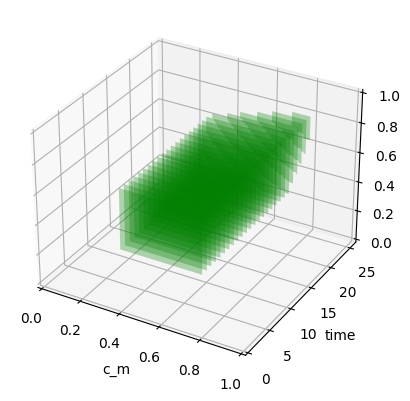

In [6]:
ax = plt.figure().add_subplot(projection='3d')

verts = square_axes
poly = PolyCollection(verts, facecolors = 'green', alpha = 0.3)
ax.add_collection3d(poly, zs=timepoints, zdir='y')
ax.set(xlim=(0, 1), ylim=(min(timepoints),max(timepoints)+1), zlim=(0, 1),
       xlabel=f"{param1}", ylabel='time', zlabel=f"{param2}")

# plt.show()

In [7]:
## Collect time, p1, and p2 info from false_boxes above

false_timepoints = []
param1 = 'c_m'
param2 = 'eps_m'

false_square_axes = []
for box in false_boxes: ## loop over true boxes 
    bounds = box['bounds']
    # for param in bounds:
    #     print(param)
    param_bounds_1 = (bounds[f"{param1}"])
    param_bounds_2 = (bounds[f"{param2}"])
    # Form square axes for polygon collection
    square_axis = []
    square_axis.append([param_bounds_1['lb'], param_bounds_2['lb']])
    square_axis.append([param_bounds_1['ub'], param_bounds_2['lb']])
    square_axis.append([param_bounds_1['ub'], param_bounds_2['ub']])
    square_axis.append([param_bounds_1['lb'], param_bounds_2['ub']])
    time_lower = bounds['num_steps']['lb']
    time_upper = bounds['num_steps']['ub']
    for i in range(int(time_lower), int(time_upper)):
        false_square_axes.append(square_axis)
        false_timepoints.append(i)


ax = plt.figure().add_subplot(projection='3d')

false_verts = false_square_axes
false_poly = PolyCollection(false_verts, facecolors = 'red', alpha = 0.1)
ax.add_collection3d(false_poly, zs=false_timepoints, zdir='y')
ax.set(xlim=(0, 1), ylim=(min(false_timepoints),max(false_timepoints)+1), zlim=(0, 1),
       xlabel=f"{param1}", ylabel='time', zlabel=f"{param2}")

plt.show()

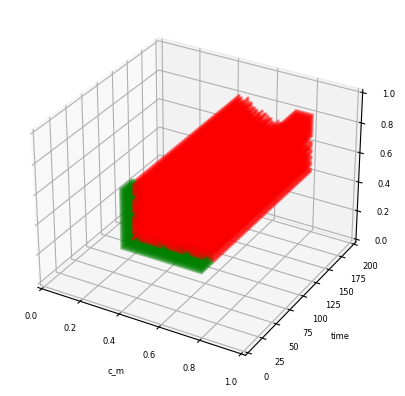

In [ ]:
### Combined plots
ax = plt.figure().add_subplot(projection='3d')
ax.set(xlim=(0, 1), ylim=(min(min(timepoints),min(false_timepoints)),max(max(timepoints),max(false_timepoints))+1), zlim=(0, 1),
       xlabel=f"{param1}", ylabel='time', zlabel=f"{param2}")
false_poly = PolyCollection(false_verts, facecolors = 'red', alpha = 0.3)
ax.add_collection3d(false_poly, zs=false_timepoints, zdir='y')
poly = PolyCollection(verts, facecolors = 'green', alpha = 0.3)
ax.add_collection3d(poly, zs=timepoints, zdir='y')


plt.show()

In [ ]:
# # Plot parameter space - ctd 3d example

# plot(0, parameters=["ai", "ai_r", "beta_scale"])

In [ ]:
# job=jobs[2]
# results = get_job_results(job)
# print(results)

JSONDecodeError: Expecting value: line 1 column 1048577 (char 1048576)

Interval([0.434809683219026, 0.4870680700225516))
Interval([0.4, 0.4507319811309092))
Interval([17.0, 17.0))
